In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdatuneq

In [4]:
delta=0.005

In [5]:

rad0=[10,1000]
ecc0=[0.,0.] #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= [0.0,0.] #math.pi/6. #math.pi/6.
mass0_1=[100.0,100.0]
mass0_2=1.0
initdatinner=initdatuneq.InitialDataEqualMassConic(rad0[0],ecc0[0],theta0[0],mass0_1[0],mass0_1[0])
initdatouter=initdatuneq.InitialDataEqualMassConic(rad0[1],ecc0[1],theta0[1],np.sum(np.array(mass0_1)),mass0_2)
print(initdatinner)
print(initdatouter)

angle 0.0
0.0
angle 0.0
0.0
(array([3.14159265, 0.        ]), 0.0, 10, 0.0, array([100., 100.]))
(array([3.14159265, 0.        ]), 0.0, 1000, 0.0, array([200.,   1.]))


In [6]:
import getxyuvtwouneq_apper #unequal mass version

In [7]:
useperihelion=True

In [8]:
xyuvouter=getxyuvtwouneq_apper.getxyuvequneq(initdatouter,useperihelion)
print(xyuvouter)
massesouter,xvecouter,avecouter=xyuvouter

initdat 1000 [3.14159265 0.        ] 0.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 1000
pi
zero
[-1000.  1000.]
[0. 0.]
circle
r0 2000.0
(array([200.,   1.]), array([[-4.97512438e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -2.23049868e-03,  0.00000000e+00],
       [ 9.95024876e+02,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  4.46099737e-01,  0.00000000e+00]]), array([[ 1.e-06, -0.e+00,  0.e+00],
       [-1.e-06, -0.e+00,  0.e+00]]))


In [9]:
np.shape(xvecouter)

(2, 6)

In [10]:
xyuvinner=getxyuvtwouneq_apper.getxyuvequneq(initdatinner,useperihelion)
print(xyuvinner)
massesinner,xvecinner,avecinner=xyuvinner

initdat 10 [3.14159265 0.        ] 0.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 10
pi
zero
[-10.  10.]
[0. 0.]
circle
r0 20.0
(array([100., 100.]), array([[-5.        ,  0.        ,  0.        , -0.        , -2.23606798,
         0.        ],
       [ 5.        ,  0.        ,  0.        , -0.        ,  2.23606798,
         0.        ]]), array([[ 1., -0.,  0.],
       [-1., -0.,  0.]]))


In [11]:
def weavexyuvtwostarsoneplanet(massesinner,massesouter,xvecinner,xvecouter, avecinner,avecouter):
    masses=np.zeros(3)
    xvec=np.zeros([3,6])
    avec=np.zeros([3,3])
    masses[0:2]=massesinner
    masses[2]=(massesouter[1])
    xvec[0:2,:]=xvecinner
    xvec[2,:]=(xvecouter[1,:])
    avec[0:2,:]=avecinner
    avec[2,:]=avecouter[1,:]
    return masses,xvec,avec
    

In [12]:
masses,xvec,avec=weavexyuvtwostarsoneplanet(massesinner,massesouter,xvecinner,xvecouter,avecinner,avecouter)

In [13]:
masses

array([100., 100.,   1.])

In [14]:
xvec

array([[-5.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -2.23606798e+00,  0.00000000e+00],
       [ 5.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  2.23606798e+00,  0.00000000e+00],
       [ 9.95024876e+02,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  4.46099737e-01,  0.00000000e+00]])

In [15]:
avec

array([[ 1.e+00, -0.e+00,  0.e+00],
       [-1.e+00, -0.e+00,  0.e+00],
       [-1.e-06, -0.e+00,  0.e+00]])

In [16]:
xyuvatwostarsplanet=masses,xvec,avec

In [17]:
import RK4implicit

In [18]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [19]:
import OrbitDiffEqAdaptive

In [20]:
#masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[100. 100.   1.] [[-5.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -2.23606798e+00  0.00000000e+00]
 [ 5.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   2.23606798e+00  0.00000000e+00]
 [ 9.95024876e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   4.46099737e-01  0.00000000e+00]] 0.0
[100. 100.   1.] [[-5.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -2.23606798e+00  0.00000000e+00]
 [ 5.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   2.23606798e+00  0.00000000e+00]
 [ 9.95024876e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   4.46099737e-01  0.00000000e+00]] 0.0


In [21]:
#print(xyuvaequneq)

In [22]:
import timestepAdaptive

In [23]:
import timestep3star

In [24]:
import parabfns

In [25]:
import ellipsefns

In [26]:
import hyperbfns

In [29]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x,npstar3x, npstar1a, npstar2a,npstar3a,nperr,npdt= timestep3star.timestep3star(numsteps,dt,dtmax,dtmin,xyuvatwostarsplanet,outputevery,delta)

0.01
[-0.00015     0.02236016  0.        ]
[2.24996700e-08 4.99976667e-04 0.00000000e+00]
0.0004999991666087418
0.02236066113979508
6.708209523064873 False
0.014484188365675303
[-0.00045951  0.03238431  0.        ]
[2.11152832e-07 1.04874374e-03 0.00000000e+00]
0.001048954894820193
0.03238757315422372
4.6314059804891015 False
0.019123390199999736
[-0.00101668  0.04274898  0.        ]
[1.03363593e-06 1.82747548e-03 0.00000000e+00]
0.001828509115786271
0.04276107009636535
3.507863569877075 False
0.02355418433896119
[-0.00185895  0.0526357   0.        ]
[3.45568553e-06 2.77051665e-03 0.00000000e+00]
0.0027739723384887774
0.052668513729635255
2.848001384090676 False
0.027538839063155834
[-0.00298595  0.06150589  0.        ]
[8.91590448e-06 3.78297442e-03 0.00000000e+00]
0.0037918903283519025
0.06157832677453896
2.4359219851686698 False
0.030963780581441256
[-0.00436749  0.06909868  0.        ]
[1.90749686e-05 4.77462692e-03 0.00000000e+00]
0.004793701885881553
0.06923656465973418
2.1664853

1.5241577455772022 False
0.04401318362768514
[-0.09634879  0.02006051  0.        ]
[0.00928309 0.00040242 0.        ]
0.009685514212945912
0.09841501009981106
1.5241577463424756 False
0.04401318249847514
[-0.09672496  0.01816028  0.        ]
[0.00935572 0.0003298  0.        ]
0.009685514198892428
0.09841501002841196
1.5241577474482366 False
0.04401318137724794
[-0.09706366  0.01625303  0.        ]
[0.00942135 0.00026416 0.        ]
0.00968551418111734
0.09841500993810517
1.5241577488468219 False
0.04401318026611753
[-0.09736475  0.01433947  0.        ]
[0.00947989 0.00020562 0.        ]
0.009685514160076236
0.0984150098312053
1.5241577505023853 False
0.044013179166939094
[-0.09762811  0.01242036  0.        ]
[0.00953125 0.00015427 0.        ]
0.009685514136112527
0.09841500970945706
1.5241577523879057 False
0.04401317808137275
[-0.09785366  0.01049644  0.        ]
[0.00957534 0.00011018 0.        ]
0.009685514109485814
0.09841500957417935
1.5241577544829579 False
0.04401317701093117
[-

1.5241581416369692 False
0.04401318653047509
[-0.03456561 -0.09214515  0.        ]
[0.00119478 0.00849073 0.        ]
0.009685509098668159
0.09841498411658745
1.52415814874595 False
0.04401318830632143
[-0.03274531 -0.09280762  0.        ]
[0.00107226 0.00861325 0.        ]
0.009685509009009014
0.09841498366107172
1.5241581558005466 False
0.044013190133096826
[-0.03091233 -0.09343413  0.        ]
[0.00095557 0.00872994 0.        ]
0.00968550892009794
0.09841498320935659
1.5241581627962832 False
0.04401319201037636
[-0.02906737 -0.09402445  0.        ]
[0.00084491 0.0088406  0.        ]
0.009685508831991721
0.09841498276173055
1.524158169728692 False
0.04401319393770285
[-0.02721115 -0.09457834  0.        ]
[0.00074045 0.00894506 0.        ]
0.009685508744747238
0.09841498231848257
1.5241581765932974 False
0.04401319591458682
[-0.02534439 -0.09509559  0.        ]
[0.00064234 0.00904317 0.        ]
0.0096855086584209
0.09841498187989926
1.5241581833856608 False
0.04401319794050674
[-0.02

0.09841497554827784
1.524158281443833 False
0.044013392304324495
[ 0.08670526 -0.04655863  0.        ]
[0.0075178  0.00216771 0.        ]
0.009685507484791795
0.0984149759172444
1.524158275729627 False
0.044013394996911835
[ 0.08760484 -0.04484306  0.        ]
[0.00767461 0.0020109  0.        ]
0.009685507560283873
0.09841497630078398
1.524158269789728 False
0.04401339764661745
[ 0.08847048 -0.04311012  0.        ]
[0.00782703 0.00185848 0.        ]
0.009685507638627177
0.09841497669880929
1.5241582636254876 False
0.04401340025182175
[ 0.08930184 -0.04136048  0.        ]
[0.00797482 0.00171069 0.        ]
0.009685507719802408
0.0984149771112223
1.5241582572384242 False
0.0440134028109161
[ 0.09009861 -0.03959481  0.        ]
[0.00811776 0.00156775 0.        ]
0.009685507803789262
0.09841497753791982
1.5241582506301359 False
0.0440134053223034
[ 0.09086047 -0.0378138   0.        ]
[0.00825562 0.00142988 0.        ]
0.009685507890565557
0.09841497797878916
1.5241582438023678 False
0.0440

0.04401339915752978
[0.05771716 0.07971353 0.        ]
[0.00333127 0.00635425 0.        ]
0.009685517830415932
0.09841502847845918
1.5241574617115679 False
0.04401339597347866
[0.05613704 0.08083409 0.        ]
[0.00315137 0.00653415 0.        ]
0.00968551798457009
0.09841502926164321
1.5241574495823655 False
0.04401339270186344
[0.05453518 0.08192333 0.        ]
[0.00297409 0.00671143 0.        ]
0.0096855181372116
0.09841503003714219
1.5241574375721822 False
0.04401338934354336
[0.05291218 0.08298084 0.        ]
[0.0027997  0.00688582 0.        ]
0.009685518288263362
0.09841503080456442
1.5241574256870842 False
0.04401338589942147
[0.05126869 0.08400619 0.        ]
[0.00262848 0.00705704 0.        ]
0.009685518437648496
0.09841503156351929
1.5241574139331207 False
0.0440133823704445
[0.04960533 0.084999   0.        ]
[0.00246069 0.00722483 0.        ]
0.009685518585290749
0.0984150323136194
1.5241574023162912 False
0.044013378757602466
[0.04792276 0.08595887 0.        ]
[0.00229659 0

0.04401303121921245
[-0.07129379  0.06784332  0.        ]
[0.0050828  0.00460272 0.        ]
0.00968552122435093
0.09841504572142884
1.5241571946690573 False
0.04401302610734411
[-0.07261526  0.06642699  0.        ]
[0.00527298 0.00441254 0.        ]
0.009685521124217757
0.09841504521269985
1.5241572025477608 False
0.044013021052354606
[-0.0739086   0.06498492  0.        ]
[0.00546248 0.00422304 0.        ]
0.009685521019853927
0.09841504468247692
1.5241572107593417 False
0.044013016056647036
[-0.07517331  0.06351767  0.        ]
[0.00565103 0.00403449 0.        ]
0.009685520911282962
0.09841504413087951
1.52415721930195 False
0.04401301112261116
[-0.07640889  0.06202582  0.        ]
[0.00583832 0.0038472  0.        ]
0.009685520798530474
0.09841504355803778
1.5241572281735698 False
0.04401300625262216
[-0.07761487  0.06050993  0.        ]
[0.00602407 0.00366145 0.        ]
0.009685520681623816
0.09841504296409069
1.5241572373720491 False
0.04401300144903968
[-0.07879079  0.05897061  0

0.04401292073738321
[-0.07912055 -0.0585273   0.        ]
[0.00626006 0.00342545 0.        ]
0.009685506643475129
0.09841497164291178
1.52415834192646 False
0.04401292390783106
[-0.0779533 -0.0600732  0.       ]
[0.00607672 0.00360879 0.        ]
0.009685506396958778
0.0984149703904786
1.5241583613229652 False
0.04401292721830675
[-0.07675585 -0.06159582  0.        ]
[0.00589146 0.00379404 0.        ]
0.009685506151676437
0.09841496914431482
1.5241583806223762 False
0.04401293066810935
[-0.07552867 -0.06309458  0.        ]
[0.00570458 0.00398093 0.        ]
0.0096855059077358
0.09841496790496759
1.5241583998162194 False
0.04401293425647678
[-0.07427223 -0.06456889  0.        ]
[0.00551636 0.00416914 0.        ]
0.00968550566524427
0.09841496667298257
1.5241584188960442 False
0.04401293798258596
[-0.07298701 -0.06601819  0.        ]
[0.0053271 0.0043584 0.       ]
0.009685505424308984
0.09841496544890409
1.5241584378534203 False
0.044012941845552926
[-0.07167351 -0.06744192  0.        ]

0.009685497665039356
0.0984149260277086
1.52415904837207 False
0.044013407119638234
[ 0.04573265 -0.08714369  0.        ]
[0.00209148 0.00759402 0.        ]
0.009685497723975943
0.0984149263271377
1.5241590437347898 False
0.0440134153566834
[ 0.04743897 -0.08622669  0.        ]
[0.00225046 0.00743504 0.        ]
0.009685497789021601
0.09841492665760414
1.5241590386168324 False
0.04401342355678205
[ 0.04912692 -0.08527628  0.        ]
[0.00241345 0.00727204 0.        ]
0.009685497860173569
0.09841492701909385
1.5241590330184154 False
0.04401343171646559
[ 0.05079583 -0.08429283  0.        ]
[0.00258022 0.00710528 0.        ]
0.009685497937426265
0.09841492741157849
1.5241590269399774 False
0.04401343983226858
[ 0.05244506 -0.08327673  0.        ]
[0.00275048 0.00693501 0.        ]
0.00968549802077133
0.09841492783501561
1.5241590203821767 False
0.044013447900730335
[ 0.05407397 -0.08222836  0.        ]
[0.00292399 0.0067615  0.        ]
0.009685498110198393
0.09841492828935249
1.5241590

0.09841501112851822
1.5241577304108411 False
0.044013723793546164
[0.09372299 0.03002526 0.        ]
[0.008784   0.00090152 0.        ]
0.009685514760664763
0.09841501288251078
1.5241577032466793 False
0.04401372235319859
[0.09311386 0.03186414 0.        ]
[0.00867019 0.00101532 0.        ]
0.009685515106064404
0.09841501463732251
1.524157676069832 False
0.04401372071665185
[0.09246866 0.03369068 0.        ]
[0.00855045 0.00113506 0.        ]
0.009685515451484931
0.09841501639224032
1.524157648891343 False
0.04401371888389411
[0.09178763 0.03550417 0.        ]
[0.00842497 0.00126055 0.        ]
0.009685515796785317
0.09841501814654773
1.5241576217223083 False
0.04401371685499364
[0.09107104 0.0373039  0.        ]
[0.00829394 0.00139158 0.        ]
0.00968551614182442
0.09841501989952764
1.5241575945738335 False
0.044013714630098906
[0.09031917 0.03908918 0.        ]
[0.00815755 0.00152796 0.        ]
0.009685516486460629
0.0984150216504606
1.5241575674570609 False
0.04401371220943878
[

[0.00018005 0.00950548 0.        ]
0.00968553168909779
0.09841509888781187
1.5241563712799013 False
0.04401319793680652
[-0.01533448  0.09721309  0.        ]
[0.00023515 0.00945039 0.        ]
0.00968553172130264
0.0984150990514293
1.5241563687459554 False
0.04401318686235796
[-0.01724486  0.09689245  0.        ]
[0.00029739 0.00938815 0.        ]
0.009685531745869787
0.0984150991762432
1.52415636681296 False
0.04401317577395738
[-0.01914856  0.09653427  0.        ]
[0.00036667 0.00931886 0.        ]
0.009685531762767471
0.09841509926209226
1.5241563654834145 False
0.044013164675961246
[-0.02104483  0.09613868  0.        ]
[0.00044289 0.00924265 0.        ]
0.009685531771967234
0.09841509930883184
1.5241563647595577 False
0.0440131535727422
[-0.02293296  0.09570586  0.        ]
[0.00052592 0.00915961 0.        ]
0.009685531773443432
0.0984150993163317
1.524156364643407 False
0.04401314246868742
[-0.02481219  0.09523595  0.        ]
[0.00061564 0.00906989 0.        ]
0.00968553176717353

[-0.09840104  0.00165858  0.        ]
[9.68276487e-03 2.75088767e-06 0.00000000e+00]
0.009685515759382838
0.09841501795652348
1.524157624665222 False
0.04401261690553138
[-0.09841462 -0.00027842  0.        ]
[9.68543782e-03 7.75178480e-08 0.00000000e+00]
0.009685515341973348
0.09841501583586393
1.5241576575079685 False
0.044012615135024497
[-0.09839008 -0.00221531  0.        ]
[9.68060731e-03 4.90760932e-06 0.00000000e+00]
0.00968551492217665
0.09841501370307607
1.5241576905385483 False
0.04401261360297105
[-0.09832742 -0.00415135  0.        ]
[9.66828082e-03 1.72336756e-05 0.00000000e+00]
0.009685514500152481
0.09841501155897144
1.5241577237443926 False
0.04401261231063627
[-0.09822666 -0.00608577  0.        ]
[9.64847746e-03 3.70366158e-05 0.00000000e+00]
0.009685514076061929
0.09841500940436844
1.524157757112827 False
0.04401261125919391
[-0.09808786 -0.00801784  0.        ]
[9.62122791e-03 6.42857446e-05 0.00000000e+00]
0.009685513650067337
0.09841500724009188
1.5241577906310781 Fa

0.044013063175260346
[-0.01669686 -0.09698817  0.        ]
[0.00027878 0.0094067  0.        ]
0.009685489575982194
0.09841488493100113
1.5241596848400045 False
0.044013076040531944
[-0.01478471 -0.09729801  0.        ]
[0.00021859 0.0094669  0.        ]
0.009685489406117086
0.09841488406799596
1.524159698205439 False
0.04401308900229556
[-0.01286683 -0.09757015  0.        ]
[0.00016556 0.00951993 0.        ]
0.00968548924480066
0.09841488324842264
1.524159710898241 False
0.044013102055695384
[-0.01094397 -0.09780449  0.        ]
[0.00011977 0.00956572 0.        ]
0.009685489092119364
0.09841488247272037
1.5241597229116084 False
0.04401311519582649
[-0.00901687 -0.09800094  0.        ]
[8.13039421e-05 9.60418501e-03 0.00000000e+00]
0.009685488948156377
0.09841488174131176
1.5241597342389965 False
0.04401312841773671
[-0.00708627 -0.09815943  0.        ]
[5.02152662e-05 9.63527355e-03 0.00000000e+00]
0.009685488812991668
0.09841488105460305
1.5241597448741133 False
0.04401314171642844
[-

0.04401391747324847
[ 0.09265761 -0.03316726  0.        ]
[0.00858543 0.00110007 0.        ]
0.009685500202758015
0.09841493892066394
1.524158848697968 False
0.04401392430234439
[ 0.09329248 -0.03133709  0.        ]
[0.00870349 0.00098201 0.        ]
0.009685500646742902
0.09841494117634224
1.5241588137641258 False
0.044013930879240666
[ 0.09389121 -0.02949477  0.        ]
[0.00881556 0.00086994 0.        ]
0.009685501096327613
0.09841494346047054
1.524158778389678 False
0.04401393720075628
[ 0.09445356 -0.02764103  0.        ]
[0.00892148 0.00076403 0.        ]
0.009685501551346318
0.09841494577220636
1.5241587425876724 False
0.04401394326380441
[ 0.09497931 -0.02577658  0.        ]
[0.00902107 0.00066443 0.        ]
0.009685502011630365
0.09841494811069285
1.524158706371379 False
0.044013949065394034
[ 0.09546827 -0.02390213  0.        ]
[0.00911419 0.00057131 0.        ]
0.009685502477008752
0.09841495047506121
1.524158669754253 False
0.044013954602631286
[ 0.09592024 -0.02201843  0

1.524156112848724 False
0.044013672871792635
[0.04523761 0.08740191 0.        ]
[0.00204644 0.00763909 0.        ]
0.009685535320613052
0.09841511733780056
1.5241560855446548 False
0.044013659752695646
[0.04350857 0.08827537 0.        ]
[0.001893   0.00779254 0.        ]
0.00968553565929036
0.09841511905845748
1.5241560588968213 False
0.04401364644122261
[0.04176267 0.08911462 0.        ]
[0.00174412 0.00794142 0.        ]
0.009685535989477054
0.09841512073597763
1.524156032917048 False
0.04401363294219666
[0.04000059 0.08991935 0.        ]
[0.00160005 0.00808549 0.        ]
0.009685536311025603
0.09841512236961149
1.5241560076169436 False
0.04401361926052472
[0.03822301 0.09068924 0.        ]
[0.001461   0.00822454 0.        ]
0.009685536623791615
0.09841512395862546
1.5241559830078681 False
0.04401360540119573
[0.03643063 0.09142399 0.        ]
[0.00132719 0.00835835 0.        ]
0.009685536927633912
0.0984151255023023
1.5241559591009304 False
0.04401359136927883
[0.03462413 0.0921233

0.09841511023627576
1.5241561955260612 False
0.04401259298330223
[-0.07829289  0.05963017  0.        ]
[0.00612978 0.00355576 0.        ]
0.009685533524117577
0.09841510821066843
1.524156226896671 False
0.044012580884971605
[-0.07945133  0.0580777   0.        ]
[0.00631251 0.00337302 0.        ]
0.009685533116318966
0.09841510613883911
1.524156258983123 False
0.044012569018281836
[-0.08057899  0.05650273  0.        ]
[0.00649297 0.00319256 0.        ]
0.009685532699564408
0.09841510402150885
1.5241562917742497 False
0.044012557388319905
[-0.08167544  0.05490588  0.        ]
[0.00667088 0.00301466 0.        ]
0.009685532274000345
0.09841510185942168
1.5241563252585293 False
0.0440125460000896
[-0.08274024  0.05328775  0.        ]
[0.00684595 0.00283958 0.        ]
0.009685531839776489
0.0984150996533382
1.5241563594241818 False
0.04401253485850967
[-0.08377299  0.05164898  0.        ]
[0.00701791 0.00266762 0.        ]
0.009685531397046296
0.09841509740403805
1.524156394259133 False
0.0

0.044012497501791724
[-0.07223942 -0.06683531  0.        ]
[0.00521853 0.00446696 0.        ]
0.00968549341340268
0.09841490442713786
1.5241593829017381 False
0.04401250818716212
[-0.07091002 -0.06824414  0.        ]
[0.00502823 0.00465726 0.        ]
0.009685492878452374
0.09841490170930607
1.5241594249930146 False
0.04401251917639819
[-0.06955314 -0.06962653  0.        ]
[0.00483764 0.00484785 0.        ]
0.009685492350038034
0.09841489902468037
1.524159466570028 False
0.044012530465787625
[-0.06816932 -0.07098194  0.        ]
[0.00464706 0.00503844 0.        ]
0.009685491828378804
0.09841489637437416
1.5241595076155348 False
0.04401254205149361
[-0.06675908 -0.07230986  0.        ]
[0.00445678 0.00522872 0.        ]
0.009685491313691827
0.09841489375949063
1.52415954811245 False
0.044012553929556004
[-0.06532299 -0.07360977  0.        ]
[0.00426709 0.0054184  0.        ]
0.00968549080619175
0.0984148911811203
1.524159588043884 False
0.04401256609589274
[-0.06386159 -0.07488116  0.  

0.044013718739564806
[ 0.05499543 -0.08161485  0.        ]
[0.0030245  0.00666098 0.        ]
0.00968548130489742
0.09841484290947895
1.5241603356311668 False
0.04401373630331248
[ 0.05659116 -0.0805166   0.        ]
[0.00320256 0.00648292 0.        ]
0.00968548159158297
0.09841484436599475
1.524160313073964 False
0.044013753704218936
[ 0.05816497 -0.07938714  0.        ]
[0.00338316 0.00630232 0.        ]
0.009685481890757228
0.09841484588595985
1.5241602895341162 False
0.04401377093518994
[ 0.05971624 -0.07822693  0.        ]
[0.00356603 0.00611945 0.        ]
0.00968548220232536
0.09841484746889241
1.5241602650190862 False
0.0440137879891851
[ 0.06124438 -0.07703641  0.        ]
[0.00375087 0.00593461 0.        ]
0.009685482526187
0.09841484911428255
1.5241602395367702 False
0.044013804859221024
[ 0.06274879 -0.07581604  0.        ]
[0.00393741 0.00574807 0.        ]
0.009685482862237006
0.09841485082159605
1.5241602130954421 False
0.04401382153837405
[ 0.06422889 -0.0745663   0.   

0.04401424174546766
[0.08987256 0.04010544 0.        ]
[0.00807708 0.00160845 0.        ]
0.009685522995347981
0.09841505471902143
1.5241570553230446 False
0.04401423562745872
[0.08906576 0.04186663 0.        ]
[0.00793271 0.00175281 0.        ]
0.009685523696408611
0.09841505828077637
1.5241570001620353 False
0.04401422911121914
[0.08822445 0.04361159 0.        ]
[0.00778355 0.00190197 0.        ]
0.009685524394122125
0.0984150618255261
1.5241569452643904 False
0.04401422219865042
[0.08734896 0.04533966 0.        ]
[0.00762984 0.00205568 0.        ]
0.009685525088209506
0.09841506535185304
1.524156890652064 False
0.04401421489181257
[0.08643962 0.04705016 0.        ]
[0.00747181 0.00221372 0.        ]
0.009685525778391789
0.09841506885833992
1.5241568363470046 False
0.04401420719292407
[0.08549679 0.04874243 0.        ]
[0.0073097  0.00237582 0.        ]
0.009685526464392169
0.09841507234358042
1.5241567823709925 False
0.044014199104360656
[0.08452084 0.05041581 0.        ]
[0.0071437

0.04401302075423878
[-0.02775005  0.09442185  0.        ]
[0.00077007 0.00891549 0.        ]
0.009685550659737542
0.09841519526850283
1.5241548786319032 False
0.04401299892233813
[-0.02960306  0.09385739  0.        ]
[0.00087634 0.00880921 0.        ]
0.009685550555148666
0.09841519473713735
1.5241548868611539 False
0.04401297714985726
[-0.03144461  0.09325656  0.        ]
[0.00098876 0.00869679 0.        ]
0.009685550435473833
0.0984151941291274
1.5241548962773963 False
0.04401295544536528
[-0.03327398  0.09261961  0.        ]
[0.00110716 0.00857839 0.        ]
0.009685550300737856
0.09841519344459906
1.5241549068786782 False
0.04401293381741715
[-0.03509045  0.09194678  0.        ]
[0.00123134 0.00845421 0.        ]
0.009685550150971096
0.09841519268370659
1.5241549186626109 False
0.04401291227455059
[-0.03689332  0.09123833  0.        ]
[0.00136112 0.00832443 0.        ]
0.009685549986210445
0.0984151918466374
1.5241549316262917 False
0.044012890825282355
[-0.0386819   0.09049453  0

1.5241580063275268 False
0.04401205363124754
[-0.09697026 -0.01680115  0.        ]
[0.00940323 0.00028228 0.        ]
0.009685510097774472
0.09841498919257408
1.5241580701338764 False
0.04401205483954161
[-0.09662081 -0.01870637  0.        ]
[0.00933558 0.00034993 0.        ]
0.009685509286473019
0.09841498507073514
1.5241581339690136 False
0.04401205650866646
[-0.09623393 -0.02060434  0.        ]
[0.00926097 0.00042454 0.        ]
0.0096855084751207
0.0984149809486376
1.524158197808161 False
0.04401205863865106
[-0.09580978 -0.02249432  0.        ]
[0.00917951 0.00050599 0.        ]
0.009685507664033005
0.0984149768278843
1.5241582616264957 False
0.04401206122934523
[-0.0953485 -0.0243756  0.       ]
[0.00909134 0.00059417 0.        ]
0.009685506853525783
0.09841497271007996
1.524158325399165 False
0.04401206428041936
[-0.0948503  -0.02624743  0.        ]
[0.00899658 0.00068893 0.        ]
0.009685506043915191
0.0984149685968308
1.5241583891012933 False
0.04401206779136429
[-0.0943153

0.044013143706831674
[ 0.00176263 -0.09839899  0.        ]
[3.10688126e-06 9.68236219e-03 0.00000000e+00]
0.009685469066739985
0.09841478073307884
1.524161298563789 False
0.04401316822199692
[ 0.00369898 -0.09834524  0.        ]
[1.36824773e-05 9.67178648e-03 0.00000000e+00]
0.009685468957970917
0.09841478018047349
1.524161307122053 False
0.04401319279896005
[ 0.0056339  -0.09825339  0.        ]
[3.17408394e-05 9.65372803e-03 0.00000000e+00]
0.009685468865889306
0.09841477971264939
1.5241613143673 False
0.04401321742824217
[ 0.00756664 -0.09812347  0.        ]
[5.72540106e-05 9.62821478e-03 0.00000000e+00]
0.009685468790555499
0.09841477932991315
1.5241613202947815 False
0.04401324210033007
[ 0.00949645 -0.09795553  0.        ]
[9.01824826e-05 9.59528625e-03 0.00000000e+00]
0.009685468732023392
0.09841477903253856
1.5241613249002568 False
0.044013266805679935
[ 0.01142258 -0.09774965  0.        ]
[0.00013048 0.00955499 0.        ]
0.009685468690340452
0.09841477882076681
1.524161328179

0.04401451818446223
[ 0.09751102 -0.01330799  0.        ]
[0.0095084 0.0001771 0.       ]
0.00968550079604826
0.09841494193489249
1.524158802016407 False
0.04401452467663485
[ 0.09775407 -0.01138609  0.        ]
[0.00955586 0.00012964 0.        ]
0.009685501660952158
0.09841494632906202
1.524158733963612 False
0.04401453067750269
[ 0.09795925 -0.00945977  0.        ]
[9.59601534e-03 8.94871872e-05 0.00000000e+00]
0.009685502531125089
0.09841495075000083
1.5241586654962456 False
0.04401453618407252
[ 0.09812648 -0.00752978  0.        ]
[9.62880580e-03 5.66976066e-05 0.00000000e+00]
0.009685503406233417
0.09841495519601387
1.524158596640559 False
0.044014541193540674
[ 0.09825568 -0.00559688  0.        ]
[9.65417925e-03 3.13250406e-05 0.00000000e+00]
0.009685504285941147
0.0984149596653941
1.5241585274229896 False
0.044014545703294335
[ 0.09834682 -0.00366181  0.        ]
[9.67209635e-03 1.34088164e-05 0.00000000e+00]
0.009685505169910015
0.09841496415642295
1.524158457870153 False
0.044

0.04401372823073441
[0.0262014  0.09486329 0.        ]
[0.00068651 0.00899904 0.        ]
0.009685556489112065
0.09841522488473044
1.5241544199659007 False
0.04401370308720631
[0.02432919 0.09536062 0.        ]
[0.00059191 0.00909365 0.        ]
0.009685556862285939
0.09841522678064578
1.5241543906039021 False
0.044013677731717736
[0.02244755 0.095821   0.        ]
[0.00050389 0.00918166 0.        ]
0.009685557218551653
0.09841522859065895
1.5241543625722698 False
0.04401365217387343
[0.02055721 0.09624426 0.        ]
[0.0004226  0.00926296 0.        ]
0.009685557557750265
0.0984152303139624
1.5241543358835095 False
0.04401362642336841
[0.01865892 0.09663024 0.        ]
[0.00034816 0.0093374  0.        ]
0.00968555787972913
0.09841523194978068
1.5241543105496311 False
0.04401360048998438
[0.01675339 0.09697877 0.        ]
[0.00028068 0.00940488 0.        ]
0.009685558184342394
0.09841523349737272
1.5241542865821112 False
0.044013574383585864
[0.01484138 0.09728973 0.        ]
[0.000220

0.09841514250779546
1.5241556957367461 False
0.04401201711453891
[-0.08807667  0.04390944  0.        ]
[0.0077575  0.00192804 0.        ]
0.009685539475310045
0.09841513844582064
1.5241557586445684 False
0.04401200163601817
[-0.08892379  0.0421675   0.        ]
[0.00790744 0.0017781  0.        ]
0.009685538664259965
0.09841513432526507
1.5241558224596365 False
0.04401198661818872
[-0.08973646  0.04040923  0.        ]
[0.00805263 0.00163291 0.        ]
0.009685537841980507
0.09841513014765822
1.5241558871582637 False
0.044011972067428524
[-0.09051436  0.03863531  0.        ]
[0.00819285 0.00149269 0.        ]
0.009685537008777861
0.09841512591455574
1.5241559527163575 False
0.04401195798994166
[-0.0912572   0.03684642  0.        ]
[0.00832788 0.00135766 0.        ]
0.009685536164962585
0.09841512162753539
1.5241560191094836 False
0.044011944391755806
[-0.09196469  0.03504326  0.        ]
[0.0084575  0.00122803 0.        ]
0.009685535310849848
0.0984151172881984
1.524156086312844 False
0

0.09841480699555258
1.524160891833874 False
0.044012256729195405
[-0.0568744  -0.08031673  0.        ]
[0.0032347  0.00645078 0.        ]
0.009685473521513839
0.09841480336572257
1.5241609480494507 False
0.044012278713468904
[-0.05528265 -0.08142052  0.        ]
[0.00305617 0.0066293  0.        ]
0.009685472821231908
0.0984147998079146
1.5241610031496187 False
0.04401230109552719
[-0.05366948 -0.08249278  0.        ]
[0.00288041 0.00680506 0.        ]
0.009685472135415544
0.09841479632359935
1.5241610571116 False
0.04401232386715414
[-0.05203552 -0.08353308  0.        ]
[0.0027077  0.00697778 0.        ]
0.009685471464348727
0.09841479291421959
1.524161109913051 False
0.044012347019972364
[-0.0503814  -0.08454103  0.        ]
[0.00253829 0.00714718 0.        ]
0.009685470808310042
0.09841478958119071
1.5241611615320507 False
0.0440123705454462
[-0.04870777 -0.08551622  0.        ]
[0.00237245 0.00731302 0.        ]
0.009685470167572669
0.09841478632590059
1.5241612119471049 False
0.044

0.04401425138620823
[ 0.07066993 -0.06849257  0.        ]
[0.00499424 0.00469123 0.        ]
0.00968547023353697
0.09841478666103469
1.5241612067568442 False
0.044014275239197036
[ 0.07200438 -0.0670883   0.        ]
[0.00518463 0.00450084 0.        ]
0.009685470894859551
0.09841479002090871
1.5241611547220875 False
0.04401429871653749
[ 0.07331093 -0.06565804  0.        ]
[0.00537449 0.00431098 0.        ]
0.009685471573010772
0.09841479346628114
1.5241611013632108 False
0.044014321808669585
[ 0.07458908 -0.06420234  0.        ]
[0.00556353 0.00412194 0.        ]
0.009685472267745724
0.0984147969959077
1.5241610466994848 False
0.04401434450617242
[ 0.07583834 -0.06272177  0.        ]
[0.00575145 0.00393402 0.        ]
0.009685472978812223
0.09841480060850717
1.5241609907507518 False
0.044014366799768334
[ 0.0770582  -0.06121688  0.        ]
[0.00593797 0.00374751 0.        ]
0.009685473705952121
0.09841480430276799
1.524160933537325 False
0.04401438868032632
[ 0.07824822 -0.05968828  

0.04401462555272402
[0.078493   0.05936657 0.        ]
[0.00616115 0.00352439 0.        ]
0.00968554090700733
0.09841514571958591
1.5241556459957364 False
0.044014609260016935
[0.07730927 0.06090007 0.        ]
[0.00597672 0.00370882 0.        ]
0.00968554187439381
0.098415150634411
1.5241555698798297 False
0.044014592417796754
[0.07609559 0.06240997 0.        ]
[0.00579054 0.003895   0.        ]
0.009685542831268008
0.09841515549582802
1.5241554945910616 False
0.04401457503203561
[0.07485242 0.06389569 0.        ]
[0.00560288 0.00408266 0.        ]
0.009685543777245844
0.09841516030188562
1.524155420159652 False
0.04401455710892381
[0.07358025 0.06535665 0.        ]
[0.00541405 0.00427149 0.        ]
0.009685544711947346
0.09841516505065337
1.5241553466154976 False
0.04401453865486753
[0.07227957 0.06679229 0.        ]
[0.00522434 0.00446121 0.        ]
0.009685545634996337
0.09841516974022012
1.5241552739881958 False
0.044014519676486626
[0.07095089 0.06820204 0.        ]
[0.00503403

0.04401255472725655
[-0.0483574   0.08571539  0.        ]
[0.00233844 0.00734713 0.        ]
0.009685566206136007
0.09841527425220135
1.5241536554133495 False
0.04401252406496168
[-0.05003503  0.08474705  0.        ]
[0.0025035  0.00718206 0.        ]
0.009685565773907327
0.09841527205625826
1.5241536894218386 False
0.04401249364820121
[-0.05169327  0.08374587  0.        ]
[0.00267219 0.00701337 0.        ]
0.009685565320468128
0.0984152697525548
1.5241537250992099 False
0.04401246348902256
[-0.05333148  0.08271226  0.        ]
[0.00284425 0.00684132 0.        ]
0.009685564845973445
0.09841526734187864
1.5241537624332655 False
0.04401243359938507
[-0.05494904  0.0816466   0.        ]
[0.0030194  0.00666617 0.        ]
0.009685564350587116
0.09841526482506215
1.5241538014111142 False
0.044012403991154976
[-0.0565453   0.08054932  0.        ]
[0.00319737 0.00648819 0.        ]
0.009685563834481147
0.0984152622029792
1.524153842019223 False
0.044012374676100786
[-0.05811966  0.07942083  0

0.09841492489897863
1.5241590658527926 False
0.04401155215877932
[-0.09140752 -0.03647138  0.        ]
[0.00835533 0.00133016 0.        ]
0.009685496278261116
0.09841491898213967
1.5241591574873112 False
0.04401156121665571
[-0.09067203 -0.03826327  0.        ]
[0.00822142 0.00146408 0.        ]
0.009685495118665025
0.09841491309077616
1.5241592487273008 False
0.044011570933194695
[-0.08990142 -0.04004033  0.        ]
[0.00808227 0.00160323 0.        ]
0.009685493964537557
0.0984149072271958
1.5241593395370214 False
0.04401158130529056
[-0.08909599 -0.04180189  0.        ]
[0.0079381 0.0017474 0.       ]
0.009685492816331662
0.09841490139369984
1.5241594298808336 False
0.044011592329580344
[-0.08825604 -0.04354725  0.        ]
[0.00778913 0.00189636 0.        ]
0.009685491674498696
0.09841489559258139
1.5241595197232232 False
0.04401160400244472
[-0.08738191 -0.04527575  0.        ]
[0.0076356  0.00204989 0.        ]
0.009685490539486988
0.09841488982611822
1.524159609028914 False
0.04

0.0440134316013012
[ 0.02015987 -0.09632772  0.        ]
[0.00040642 0.00927903 0.        ]
0.009685449522830415
0.09841468143946011
1.5241628363373065 False
0.044013467218257205
[ 0.02205192 -0.09591226  0.        ]
[0.00048629 0.00919916 0.        ]
0.009685449618143627
0.09841468192370297
1.5241628288377653 False
0.04401350278110065
[ 0.02393542 -0.09545965  0.        ]
[0.0005729  0.00911255 0.        ]
0.009685449737858004
0.09841468253191697
1.5241628194182644 False
0.04401353827597066
[ 0.02580966 -0.09497006  0.        ]
[0.00066614 0.00901931 0.        ]
0.009685449881951906
0.09841468326399219
1.5241628080805067 False
0.044013573689018586
[ 0.0276739  -0.09444366  0.        ]
[0.00076584 0.00891961 0.        ]
0.009685450050393972
0.09841468411976931
1.5241627948269596 False
0.04401360900641355
[ 0.02952742 -0.09388068  0.        ]
[0.00087187 0.00881358 0.        ]
0.009685450243143549
0.09841468509904175
1.5241627796608224 False
0.04401364421434774
[ 0.0313695  -0.09328132 

0.0440151162239775
[0.09827787 0.00519311 0.        ]
[9.65853987e-03 2.69683795e-05 0.00000000e+00]
0.009685508248897095
0.09841497979930237
1.524158215607979 False
0.04401511848261737
[0.09815662 0.00712658 0.        ]
[9.63472141e-03 5.07881221e-05 0.00000000e+00]
0.009685509529491374
0.09841498630539647
1.5241581148477479 False
0.04401512001381091
[0.09799733 0.00905729 0.        ]
[9.60347636e-03 8.20344503e-05 0.00000000e+00]
0.009685510812321413
0.09841499282284896
1.5241580139116218 False
0.04401512081628812
[0.09780007 0.01098449 0.        ]
[0.00956485 0.00012066 0.        ]
0.009685512096889429
0.09841499934913087
1.524157912838768 False
0.04401512088906179
[0.09756491 0.01290743 0.        ]
[0.00951891 0.0001666  0.        ]
0.00968551338269643
0.09841500588170703
1.5241578116684478 False
0.04401512023142821
[0.09729195 0.01482537 0.        ]
[0.00946572 0.00021979 0.        ]
0.00968551466924266
0.09841501241803845
1.5241577104399833 False
0.04401511884296758
[0.09698129 0

0.04401358908442575
[0.0079664  0.09809238 0.        ]
[6.34634942e-05 9.62211482e-03 0.00000000e+00]
0.0096855783105741
0.09841533574892736
1.5241527030164592 False
0.04401355154572785
[0.00603417 0.09823018 0.        ]
[3.64112439e-05 9.64916734e-03 0.00000000e+00]
0.009685578583030695
0.09841533713314554
1.5241526815791513 False
0.04401351385229872
[0.00409961 0.09832991 0.        ]
[1.68068321e-05 9.66877200e-03 0.00000000e+00]
0.009685578829971632
0.09841533838773117
1.5241526621494559 False
0.0440134760186324
[0.00216347 0.09839156 0.        ]
[4.68059941e-06 9.68089845e-03 0.00000000e+00]
0.009685579051279597
0.09841533951208824
1.524152644736603 False
0.04401343805928948
[0.00022649 0.09841508 0.        ]
[5.12977517e-08 9.68552795e-03 0.00000000e+00]
0.009685579246847114
0.09841534050567073
1.5241526293490488 False
0.04401339998889158
[-0.00171057  0.09840047  0.        ]
[2.92606197e-06 9.68265335e-03 0.00000000e+00]
0.009685579416576632
0.09841534136798304
1.5241526159944687

0.04401134421063098
[-0.09571708  0.02288615  0.        ]
[0.00916176 0.00052378 0.        ]
0.009685535942933983
0.09841512049951462
1.5241560365791533 False
0.04401133073874774
[-0.09614895  0.02099797  0.        ]
[0.00924462 0.00044091 0.        ]
0.009685534662982625
0.09841511399669578
1.5241561372883858 False
0.044011317993885045
[-0.09654356  0.01910167  0.        ]
[0.00932066 0.00036487 0.        ]
0.009685533373237371
0.09841510744411841
1.5241562387682426 False
0.044011305981605325
[-0.09690079  0.01719796  0.        ]
[0.00938976 0.00029577 0.        ]
0.009685532074189375
0.09841510084427783
1.5241563409800791 False
0.04401129470719206
[-0.09722047  0.01528759  0.        ]
[0.00945182 0.00023371 0.        ]
0.009685530766333756
0.0984150941996895
1.5241564438849386 False
0.044011284175647536
[-0.0975025  0.0133713  0.       ]
[0.00950674 0.00017879 0.        ]
0.00968552945016954
0.0984150875128887
1.5241565474435572 False
0.04401127439169064
[-0.09774676  0.01144983  0. 

0.044012298588502155
[-0.0354709  -0.09180013  0.        ]
[0.00125818 0.00842726 0.        ]
0.009685448709111899
0.09841467730532828
1.5241629003632249 False
0.04401233466675077
[-0.03365728 -0.09248046  0.        ]
[0.00113281 0.00855264 0.        ]
0.009685448038684503
0.09841467389919302
1.5241629531145555 False
0.044012371125846377
[-0.03183062 -0.09312496  0.        ]
[0.00101319 0.00867226 0.        ]
0.009685447392559622
0.0984146706165276
1.5241630039536933 False
0.04401240795198557
[-0.02999163 -0.09373339  0.        ]
[0.0008995  0.00878595 0.        ]
0.009685446771009722
0.09841466745871634
1.5241630528591994 False
0.04401244513121015
[-0.02814102 -0.09430551  0.        ]
[0.00079192 0.00889353 0.        ]
0.009685446174297391
0.09841466442709335
1.5241630998104112 False
0.0440124826494127
[-0.0262795 -0.0948411  0.       ]
[0.00069061 0.00899483 0.        ]
0.009685445602676571
0.09841466152294875
1.524163144787348 False
0.04401252049234154
[-0.0244078  -0.09533994  0.  

0.04401496771552433
[ 0.08529431 -0.0490953   0.        ]
[0.00727512 0.00241035 0.        ]
0.009685468288784485
0.09841477678064654
1.5241613597755757 False
0.04401499267362666
[ 0.08624417 -0.04740689  0.        ]
[0.00743806 0.00224741 0.        ]
0.009685469450283417
0.09841478268168567
1.524161268385486 False
0.04401501697194809
[ 0.0871606  -0.04570011  0.        ]
[0.00759697 0.0020885  0.        ]
0.009685470629360097
0.09841478867202884
1.5241611756123452 False
0.04401504060050247
[ 0.08804327 -0.04397561  0.        ]
[0.00775162 0.00193385 0.        ]
0.009685471825570186
0.09841479474941858
1.5241610814911157 False
0.0440150635495561
[ 0.08889182 -0.04223408  0.        ]
[0.00790176 0.00178372 0.        ]
0.009685473038462998
0.09841480091156511
1.5241609860572598 False
0.044015085809631274
[ 0.08970593 -0.04047617  0.        ]
[0.00804715 0.00163832 0.        ]
0.009685474267580544
0.09841480715614162
1.524160889346814 False
0.04401510737151049
[ 0.09048528 -0.03870258  0.

0.09841526673321191
1.5241537718596656 False
0.04401478136398321
[0.06155738 0.07678708 0.        ]
[0.00378931 0.00589626 0.        ]
0.009685565820853854
0.09841527229477066
1.5241536857280058 False
0.04401475091899497
[0.06003402 0.07798386 0.        ]
[0.00360408 0.00608148 0.        ]
0.009685566895583057
0.09841527775494543
1.5241536011664856 False
0.04401471986353297
[0.05848742 0.07915043 0.        ]
[0.00342078 0.00626479 0.        ]
0.00968556794992379
0.09841528311153604
1.5241535182091785 False
0.044014688209180114
[0.05691815 0.08028632 0.        ]
[0.00323968 0.00644589 0.        ]
0.009685568983450861
0.0984152883623823
1.5241534368895386 False
0.044014655967760864
[0.05532682 0.08139111 0.        ]
[0.00306106 0.00662451 0.        ]
0.009685569995746785
0.09841529350536321
1.5241533572404133 False
0.04401462315133677
[0.05371407 0.08246436 0.        ]
[0.0028852  0.00680037 0.        ]
0.009685570986402003
0.09841529853839799
1.5241532792940273 False
0.04401458977220206

0.044011894205362036
[-0.06646546  0.07258043  0.        ]
[0.00441766 0.00526792 0.        ]
0.009685575553094017
0.09841532173952396
1.5241529199793231 False
0.04401185823437957
[-0.06788102  0.07125828  0.        ]
[0.00460783 0.00507774 0.        ]
0.009685574660575975
0.09841531720507725
1.5241529902040645 False
0.04401182277038331
[-0.06927028  0.06990852  0.        ]
[0.00479837 0.0048872  0.        ]
0.009685573743196249
0.0984153125443203
1.5241530623849726 False
0.044011787827493695
[-0.07063271  0.06853169  0.        ]
[0.00498898 0.00469659 0.        ]
0.009685572801291974
0.0984153077589659
1.5241531364955223 False
0.04401175341963962
[-0.07196778  0.06712832  0.        ]
[0.00517936 0.00450621 0.        ]
0.009685571835210365
0.09841530285077807
1.524153212508395 False
0.04401171956055277
[-0.07327496  0.06569894  0.        ]
[0.00536922 0.00431635 0.        ]
0.009685570845307785
0.09841529782156727
1.5241532903955524 False
0.044011686263762374
[-0.07455376  0.06424411  

0.0440111428369469
[-0.08398558 -0.05130205  0.        ]
[0.00705358 0.0026319  0.        ]
0.009685478445016106
0.09841482837975234
1.5241605606545028 False
0.044011162024091804
[-0.08295967 -0.05294497  0.        ]
[0.00688231 0.00280317 0.        ]
0.009685477004235634
0.09841482105981615
1.5241606740191151 False
0.04401118202961528
[-0.08190163 -0.05456738  0.        ]
[0.00670788 0.0029776  0.        ]
0.009685475575997096
0.09841481380359918
1.5241607863969182 False
0.04401120284639468
[-0.08081186 -0.05616865  0.        ]
[0.00653056 0.00315492 0.        ]
0.00968547416086242
0.09841480661395632
1.524160897743697 False
0.04401122446698821
[-0.07969079 -0.05774817  0.        ]
[0.00635062 0.00333485 0.        ]
0.009685472759390096
0.09841479949372502
1.5241610080155077 False
0.04401124688363687
[-0.07853885 -0.05930532  0.        ]
[0.00616835 0.00351712 0.        ]
0.00968547137213303
0.09841479244571433
1.5241611171688454 False
0.04401127008826765
[-0.07735649 -0.06083949  0. 

0.044013916728812864
[ 0.03784404 -0.09084746  0.        ]
[0.00143217 0.00825326 0.        ]
0.009685432879516554
0.09841459688235558
1.5241641458869093 False
0.044013961800275184
[ 0.03962484 -0.09008499  0.        ]
[0.00157013 0.00811531 0.        ]
0.009685433314261391
0.0984145990910972
1.5241641116797409 False
0.04401400662482952
[ 0.04139029 -0.08928761  0.        ]
[0.00171316 0.00797228 0.        ]
0.009685433779942649
0.09841460145701271
1.5241640750383945 False
0.04401405118490187
[ 0.0431397  -0.08845564  0.        ]
[0.00186103 0.0078244  0.        ]
0.009685434276403665
0.09841460397930617
1.5241640359751973 False
0.044014095463007157
[ 0.04487241 -0.08758939  0.        ]
[0.00201353 0.0076719  0.        ]
0.009685434803475642
0.09841460665711997
1.5241639945034318 False
0.044014139441756125
[ 0.04658773 -0.08668921  0.        ]
[0.00217042 0.00751502 0.        ]
0.009685435360977521
0.09841460948953423
1.5241639506373446 False
0.04401418310386231
[ 0.04828501 -0.0857554

0.0440156617475586
[0.09556538 0.02351128 0.        ]
[0.00913274 0.00055278 0.        ]
0.00968552292331844
0.09841505435307364
1.5241570609904895 False
0.044015655670269375
[0.09508408 0.02538785 0.        ]
[0.00904098 0.00064454 0.        ]
0.009685524580999144
0.09841506277495912
1.5241569305604936 False
0.0440156486513193
[0.09456592 0.02725459 0.        ]
[0.00894271 0.00074281 0.        ]
0.009685526235059975
0.09841507117845302
1.5241568004153512 False
0.04401564069276532
[0.09401112 0.02911077 0.        ]
[0.00883809 0.00084744 0.        ]
0.009685527884855065
0.09841507956027402
1.5241566706058793 False
0.04401563179703127
[0.09341989 0.03095566 0.        ]
[0.00872728 0.00095825 0.        ]
0.009685529529739867
0.09841508791714747
1.5241565411827933 False
0.044015621966907226
[0.09279247 0.03278856 0.        ]
[0.00861044 0.00107509 0.        ]
0.009685531169071173
0.09841509624580556
1.5241564121967006 False
0.044015611205548685
[0.09212908 0.03460875 0.        ]
[0.008487

0.04401328626867222
[-0.00862267  0.09803698  0.        ]
[7.43503768e-05 9.61124872e-03 0.00000000e+00]
0.009685599097345352
0.09841544135624933
1.52415106748363 False
0.044013236922829366
[-0.01055056  0.09784827  0.        ]
[0.00011131 0.00957428 0.        ]
0.009685599156067884
0.09841544165458936
1.5241510628632648 False
0.04401318754368605
[-0.01247436  0.09762167  0.        ]
[0.00015561 0.00952999 0.        ]
0.009685599181131155
0.09841544178192341
1.5241510608912539 False
0.04401313815036162
[-0.01439332  0.09735724  0.        ]
[0.00020717 0.00947843 0.        ]
0.009685599172503797
0.09841544173809208
1.5241510615700657 False
0.04401308876199315
[-0.0163067   0.09705509  0.        ]
[0.00026591 0.00941969 0.        ]
0.009685599130167375
0.09841544152300173
1.5241510649011505 False
0.044013039397728104
[-0.01821376  0.09671534  0.        ]
[0.00033174 0.00935386 0.        ]
0.009685599054116633
0.09841544113662568
1.5241510708849217 False
0.04401299007671684
[-0.02011376  

1.5241565058199527 False
0.04401070603627332
[-0.098201    0.00648779  0.        ]
[9.64343688e-03 4.20913834e-05 0.00000000e+00]
0.009685528265482888
0.09841508149406211
1.524156640657258 False
0.044010696925341666
[-0.09830965  0.00455396  0.        ]
[9.66478801e-03 2.07385335e-05 0.00000000e+00]
0.009685526544422457
0.09841507275017611
1.5241567760740347 False
0.04401068879196649
[-0.09838023  0.00261837  0.        ]
[9.67866898e-03 6.85583945e-06 0.00000000e+00]
0.009685524816658738
0.09841506397223312
1.5241569120182767 False
0.044010681639954856
[-0.09841269  0.00068176  0.        ]
[9.68505829e-03 4.64797044e-07 0.00000000e+00]
0.00968552308285567
0.0984150551636063
1.5241570484377447 False
0.04401067547273679
[-0.09840704 -0.00125511  0.        ]
[9.68394605e-03 1.57529760e-06 0.00000000e+00]
0.009685521343680049
0.09841504632768329
1.524157185279974 False
0.04401067029336364
[-0.09836328 -0.00319149  0.        ]
[9.67533399e-03 1.01856126e-05 0.00000000e+00]
0.009685519599801

0.04401234007107547
[-0.0233341 -0.0956083  0.       ]
[0.00054448 0.00914095 0.        ]
0.009685426708933258
0.0984145655324112
1.5241646314091586 False
0.044012388645957426
[-0.02144787 -0.09604902  0.        ]
[0.00046001 0.00922541 0.        ]
0.00968542607224197
0.09841456229767
1.524164681506197 False
0.04401243758254892
[-0.01955334 -0.09645254  0.        ]
[0.00038233 0.00930309 0.        ]
0.009685425468493844
0.09841455923029806
1.52416472901116 False
0.04401248686213866
[-0.01765123 -0.09681869  0.        ]
[0.00031157 0.00937386 0.        ]
0.009685424897946318
0.09841455633160329
1.5241647739037907 False
0.04401253646586905
[-0.01574227 -0.09714734  0.        ]
[0.00024782 0.00943761 0.        ]
0.009685424360843934
0.09841455360282815
1.5241648161648464 False
0.044012586374743465
[-0.01382721 -0.09743835  0.        ]
[0.00019119 0.00949423 0.        ]
0.009685423857418524
0.09841455104515046
1.524164855776086 False
0.044012636569633556
[-0.01190679 -0.09769162  0.       

1.5241616090358616 False
0.04401560140418476
[ 0.09091526 -0.03768133  0.        ]
[0.00826558 0.00141988 0.        ]
0.009685466702713108
0.09841476872255052
1.524161484572278 False
0.0440156272636345
[ 0.09163938 -0.03588443  0.        ]
[0.00839778 0.00128769 0.        ]
0.0096854683032559
0.0984147768541691
1.5241613586369231 False
0.044015652213890144
[ 0.09232799 -0.03407363  0.        ]
[0.00852446 0.00116101 0.        ]
0.009685469921894762
0.09841478507772479
1.5241612312777484 False
0.044015676244670586
[ 0.09298082 -0.03224962  0.        ]
[0.00864543 0.00104004 0.        ]
0.009685471558012568
0.0984147933900822
1.5241611025433126 False
0.04401569934604534
[ 0.09359763 -0.03041312  0.        ]
[0.00876052 0.00092496 0.        ]
0.009685473210985247
0.09841480178807072
1.52416097248272 False
0.04401572150843844
[ 0.09417816 -0.02856482  0.        ]
[0.00886953 0.00081595 0.        ]
0.009685474880181484
0.09841481026848288
1.5241608411456458 False
0.044015742722632624
[ 0.09

0.04401496350033977
[0.05277961 0.08306563 0.        ]
[0.00278569 0.0068999  0.        ]
0.00968558641755012
0.09841537693648346
1.5241520651473892 False
0.04401492135532669
[0.05113437 0.08408843 0.        ]
[0.00261472 0.00707086 0.        ]
0.00968558761227318
0.098415383006282
1.524151971144849 False
0.04401487853169621
[0.04946931 0.08507865 0.        ]
[0.00244721 0.00723838 0.        ]
0.00968558877849154
0.09841538893126187
1.5241518793851168 False
0.044014835045642346
[0.04778509 0.08603589 0.        ]
[0.00228342 0.00740217 0.        ]
0.009685589915735496
0.09841539470903674
1.5241517899051482 False
0.044014790913625895
[0.04608236 0.0869598  0.        ]
[0.00212358 0.00756201 0.        ]
0.009685591023545988
0.09841540033727439
1.5241517027410614 False
0.04401474615236839
[0.04436178 0.08785001 0.        ]
[0.00196797 0.00771762 0.        ]
0.009685592101475822
0.09841540581370288
1.5241516179280412 False
0.04401470077884533
[0.04262401 0.08870618 0.        ]
[0.00181681 0

0.04401133494086781
[-0.07401191  0.06486772  0.        ]
[0.00547776 0.00420782 0.        ]
0.009685584708986778
0.09841536825611526
1.5241521995796568 False
0.04401129376979295
[-0.07527419  0.06339858  0.        ]
[0.0056662  0.00401938 0.        ]
0.009685583427997033
0.09841536174803725
1.5241523003698305 False
0.0440112533263581
[-0.0765073   0.06190489  0.        ]
[0.00585337 0.00383222 0.        ]
0.009685582118666783
0.09841535509597464
1.524152403389898 False
0.04401121362665874
[-0.07771078  0.06038722  0.        ]
[0.00603896 0.00364662 0.        ]
0.009685580781486373
0.09841534830241863
1.524152508601279 False
0.04401117468651179
[-0.07888415  0.05884616  0.        ]
[0.00622271 0.00346287 0.        ]
0.009685579416957118
0.09841534136991609
1.5241526159645316 False
0.04401113652144946
[-0.08002696  0.05728231  0.        ]
[0.00640432 0.00328126 0.        ]
0.00968557802559121
0.0984153343010692
1.5241527254393563 False
0.04401109914671299
[-0.08113878  0.05569627  0.   

0.04401083587831687
[-0.07543758 -0.06320308  0.        ]
[0.00569083 0.00399463 0.        ]
0.009685457467615677
0.0984147218032733
1.5241622112171733 False
0.04401086698051702
[-0.07417913 -0.06467544  0.        ]
[0.00550254 0.00418291 0.        ]
0.00968545581823967
0.098414713423551
1.524162340995086 False
0.04401089901958863
[-0.07289195 -0.06612275  0.        ]
[0.00531324 0.00437222 0.        ]
0.00968545418968202
0.09841470514959652
1.5241624691349793 False
0.04401093198370901
[-0.07157652 -0.06754446  0.        ]
[0.0051232  0.00456225 0.        ]
0.009685452582585845
0.09841469698467727
1.5241625955862501 False
0.04401096586069022
[-0.07023338 -0.06894     0.        ]
[0.00493273 0.00475272 0.        ]
0.009685450997586928
0.09841468893202339
1.5241627202988715 False
0.04401100063798318
[-0.06886302 -0.07030884  0.        ]
[0.00474212 0.00494333 0.        ]
0.009685449435312217
0.09841468099482016
1.5241628432235117 False
0.044011036302682716
[-0.06746599 -0.07165045  0.   

0.04401457570704414
[ 0.05418944 -0.08215184  0.        ]
[0.0029365  0.00674893 0.        ]
0.009685420948996853
0.09841453626876902
1.524165084620748 False
0.04401462755633918
[ 0.05579597 -0.0810693   0.        ]
[0.00311319 0.00657223 0.        ]
0.009685421841840947
0.09841454080490823
1.52416501436868 False
0.04401467889851233
[ 0.05738088 -0.07995534  0.        ]
[0.00329257 0.00639286 0.        ]
0.009685422770275055
0.09841454552186407
1.5241649413162768 False
0.04401472971334481
[ 0.05894357 -0.0788104   0.        ]
[0.00347434 0.00621108 0.        ]
0.009685423733961364
0.09841455041792023
1.5241648654901196 False
0.04401477998080969
[ 0.06048342 -0.07763492  0.        ]
[0.00365824 0.00602718 0.        ]
0.009685424732548352
0.09841455549129077
1.524164786917869 False
0.044014829681079636
[ 0.06199983 -0.07642936  0.        ]
[0.00384398 0.00584145 0.        ]
0.009685425765670056
0.09841456074011638
1.524164705628321 False
0.04401487879453515
[ 0.06349223 -0.07519418  0.  

0.044016116581507135
[0.09025879 0.03922873 0.        ]
[0.00814665 0.00153889 0.        ]
0.009685542293897597
0.09841515276570777
1.5241555368724347 False
0.04401609950040497
[0.08946911 0.04099784 0.        ]
[0.00800472 0.00168082 0.        ]
0.009685544263525038
0.09841516277243582
1.5241553818982463 False
0.04401608130043463
[0.08864476 0.04275106 0.        ]
[0.00785789 0.00182765 0.        ]
0.009685546221852883
0.09841517272175507
1.5241552278131794 False
0.044016061988016615
[0.08778606 0.04448771 0.        ]
[0.00770639 0.00197916 0.        ]
0.009685548168113598
0.09841518260976605
1.5241550746776242 False
0.04401604157000752
[0.08689334 0.04620712 0.        ]
[0.00755045 0.0021351  0.        ]
0.009685550101544512
0.09841519243259403
1.5241549225515882 False
0.04401602005369724
[0.08596694 0.04790863 0.        ]
[0.00739032 0.00229524 0.        ]
0.00968555202138729
0.09841520218638627
1.5241547714947379 False
0.04401599744680651
[0.08500724 0.04959156 0.        ]
[0.00722

[0.00044947 0.00923615 0.        ]
0.009685618092242299
0.09841553785984355
1.5241495729426322 False
0.04401285970871516
[-0.02308801  0.09566902  0.        ]
[0.00053306 0.00915256 0.        ]
0.0096856178933852
0.09841553684955033
1.5241495885889216 False
0.04401279968686029
[-0.02496646  0.09519608  0.        ]
[0.00062332 0.00906229 0.        ]
0.00968561765348228
0.09841553563072387
1.5241496074647407 False
0.044012739801356136
[-0.02683522  0.09468626  0.        ]
[0.00072013 0.00896549 0.        ]
0.009685617372604916
0.09841553420372678
1.5241496295644739 False
0.04401268007547628
[-0.02869359  0.09413976  0.        ]
[0.00082332 0.0088623  0.        ]
0.00968561705084068
0.09841553256900396
1.5241496548812317 False
0.044012620532444445
[-0.03054083  0.0935568   0.        ]
[0.00093274 0.00875287 0.        ]
0.009685616688292775
0.09841553072707973
1.5241496834068937 False
0.044012561195425605
[-0.03237624  0.09293759  0.        ]
[0.00104822 0.0086374  0.        ]
0.0096856162

0.04401010856409497
[-0.0982174  -0.00623387  0.        ]
[9.64665707e-03 3.88611292e-05 0.00000000e+00]
0.009685518197051773
0.09841503034116167
1.5241574328638208 False
0.04401010517203695
[-0.09807569 -0.00816551  0.        ]
[9.61884059e-03 6.66754762e-05 0.00000000e+00]
0.009685516065624875
0.09841501951239391
1.52415760056939 False
0.04401010299060525
[-0.09789599 -0.01009398  0.        ]
[0.00958363 0.00010189 0.        ]
0.009685513931529357
0.09841500867006697
1.5241577684849876 False
0.04401010202131572
[-0.09767838 -0.01201854  0.        ]
[0.00954107 0.00014445 0.        ]
0.009685511795588917
0.09841499781836566
1.524157936545804 False
0.04401010226521643
[-0.09742294 -0.01393845  0.        ]
[0.00949123 0.00019428 0.        ]
0.009685509658628612
0.0984149869614817
1.524158104686921 False
0.04401010372288693
[-0.09712977 -0.01585296  0.        ]
[0.00943419 0.00025132 0.        ]
0.009685507521474223
0.09841497610361048
1.524158272843365 False
0.044010106394437865
[-0.096

1.5241664251338796 False
0.044012647755095904
[-0.00694941 -0.09816878  0.        ]
[4.82943084e-05 9.63710914e-03 0.00000000e+00]
0.00968540344965132
0.09841444736242398
1.5241664615318675 False
0.044012709542243025
[-0.00501594 -0.09828654  0.        ]
[2.51596464e-05 9.66024338e-03 0.00000000e+00]
0.009685403028936218
0.09841444522495779
1.524166494635283 False
0.044012771568455546
[-0.00308052 -0.09836622  0.        ]
[9.48959856e-06 9.67591305e-03 0.00000000e+00]
0.009685402650279987
0.09841444330117398
1.5241665244293534 False
0.04401283380984377
[-0.0011439  -0.09840779  0.        ]
[1.30850796e-06 9.68409381e-03 0.00000000e+00]
0.00968540231385411
0.09841444159194376
1.5241665509005848 False
0.04401289624242045
[ 0.00079317 -0.09841124  0.        ]
[6.29114151e-07 9.68477291e-03 0.00000000e+00]
0.009685402019813891
0.0984144400980562
1.5241665740367574 False
0.044012958842109984
[ 0.00272993 -0.09837657  0.        ]
[7.45253339e-06 9.67794923e-03 0.00000000e+00]
0.0096854017682

0.04401628975486753
[ 0.09550318 -0.02376162  0.        ]
[0.00912086 0.00056461 0.        ]
0.009685472083152156
0.09841479605807328
1.5241610612238323 False
0.04401631255824752
[ 0.09595243 -0.02187706  0.        ]
[0.00920687 0.00047861 0.        ]
0.009685474158899381
0.09841480660398302
1.5241608978981545 False
0.04401633418246636
[ 0.09636449 -0.01998401  0.        ]
[0.00928612 0.00039936 0.        ]
0.009685476250538477
0.09841481723063086
1.5241607333221123 False
0.04401635461849483
[ 0.09673921 -0.01808322  0.        ]
[0.00935848 0.000327   0.        ]
0.009685478357265782
0.09841482793393373
1.5241605675589414 False
0.04401637385776036
[ 0.09707645 -0.01617542  0.        ]
[0.00942384 0.00026164 0.        ]
0.009685480478271365
0.09841483870977671
1.5241604006723706 False
0.04401639189215054
[ 0.09737606 -0.01426135  0.        ]
[0.0094821  0.00020339 0.        ]
0.009685482612739082
0.09841484955401335
1.524160232726617 False
0.04401640871401671
[ 0.09763793 -0.01234174  0

0.04401498187865954
[0.04161963 0.08918193 0.        ]
[0.00173219 0.00795342 0.        ]
0.009685609940145334
0.09841549644311781
1.5241502143587418 False
0.044014926371709534
[0.03985616 0.08998388 0.        ]
[0.00158851 0.0080971  0.        ]
0.009685611142159125
0.09841550254994955
1.524150119782901 False
0.04401487018203207
[0.03807725 0.09075095 0.        ]
[0.00144988 0.00823574 0.        ]
0.009685612306437386
0.09841550846506553
1.5241500281761524 False
0.044014813331065286
[0.03628359 0.09148287 0.        ]
[0.0013165  0.00836911 0.        ]
0.009685613432509774
0.09841551418607623
1.5241499395755014 False
0.0440147558405144
[0.03447587 0.09217933 0.        ]
[0.00118859 0.00849703 0.        ]
0.009685614519921044
0.09841551971066882
1.5241498540167655 False
0.044014697732343136
[0.0326548  0.09284007 0.        ]
[0.00106634 0.00861928 0.        ]
0.009685615568230343
0.09841552503660356
1.5241497715346302 False
0.04401463902876556
[0.03082109 0.09346484 0.        ]
[0.00094

0.044010710504897285
[-0.08066836  0.05637558  0.        ]
[0.00650738 0.00317821 0.        ]
0.00968559035078237
0.09841539691929495
1.5241517556750468 False
0.04401066612991342
[-0.08176219  0.05477713  0.        ]
[0.00668506 0.00300053 0.        ]
0.00968558863786852
0.09841538821682573
1.5241518904495366 False
0.04401062272789396
[-0.08282434  0.05315746  0.        ]
[0.00685987 0.00282572 0.        ]
0.009685586894520759
0.09841537935973604
1.5241520276186467 False
0.04401058031612238
[-0.08385441  0.05151721  0.        ]
[0.00703156 0.00265402 0.        ]
0.009685585121398905
0.09841537035137807
1.524152167130463 False
0.04401053891150739
[-0.084852    0.04985701  0.        ]
[0.00719986 0.00248572 0.        ]
0.009685583319174547
0.09841536119516377
1.5241523089321463 False
0.04401049853057628
[-0.08581672  0.0481775   0.        ]
[0.00736451 0.00232107 0.        ]
0.009685581488530477
0.09841535189456205
1.5241524529699748 False
0.04401045918946848
[-0.0867482   0.04647934  0.

0.09841460665084413
1.5241639946006267 False
0.04401066645406569
[-0.06521764 -0.07370273  0.        ]
[0.00425334 0.00543209 0.        ]
0.009685433010206702
0.09841459754633304
1.524164135603774 False
0.044010711447967456
[-0.06375455 -0.07497192  0.        ]
[0.00406464 0.00562079 0.        ]
0.00968543124790077
0.09841458859285432
1.524164274267882 False
0.04401075744290848
[-0.06226675 -0.07621208  0.        ]
[0.00387715 0.00580828 0.        ]
0.009685429516020517
0.09841457979395389
1.5241644105380334 False
0.04401080442161021
[-0.06075484 -0.07742272  0.        ]
[0.00369115 0.00599428 0.        ]
0.009685427815251925
0.09841457115311698
1.5241645443602505 False
0.044010852366404445
[-0.05921939 -0.07860337  0.        ]
[0.00350694 0.00617849 0.        ]
0.009685426146269962
0.09841456267377284
1.5241646756814224 False
0.044010901259239565
[-0.057661   -0.07975358  0.        ]
[0.00332479 0.00636063 0.        ]
0.009685424509737023
0.09841455435928684
1.5241648044494276 False
0

0.044015026629531814
[ 0.05982633 -0.07814229  0.        ]
[0.00357919 0.00610622 0.        ]
0.0096854074731038
0.09841446780379295
1.5241661449519002 False
0.044015086134458384
[ 0.06135288 -0.07694955  0.        ]
[0.00376418 0.00592123 0.        ]
0.00968540868041136
0.09841447393758379
1.5241660499565608 False
0.04401514495364224
[ 0.06285566 -0.07572699  0.        ]
[0.00395083 0.00573458 0.        ]
0.009685409928477183
0.09841448027844878
1.5241659517542323 False
0.044015203063927553
[ 0.06433409 -0.07447507  0.        ]
[0.00413887 0.00554654 0.        ]
0.009685411216838838
0.09841448682403846
1.5241658503813018 False
0.0440152604424211
[ 0.06578759 -0.0731943   0.        ]
[0.00432801 0.00535741 0.        ]
0.009685412545018077
0.09841449357192301
1.5241657458754019 False
0.04401531706650126
[ 0.0672156  -0.07188516  0.        ]
[0.00451794 0.00516748 0.        ]
0.009685413912520889
0.09841450051959258
1.524165638275405 False
0.04401537291382697
[ 0.06861758 -0.07054817  0.

1.5241544851099929 False
0.04401655364429966
[0.08636658 0.04718445 0.        ]
[0.00745919 0.00222637 0.        ]
0.00968555794393007
0.09841523227595447
1.5241543054981854 False
0.04401652767272032
[0.08542103 0.04887543 0.        ]
[0.00729675 0.00238881 0.        ]
0.009685560210061193
0.09841524378906549
1.5241541271949364 False
0.0440165004138382
[0.08444238 0.05054747 0.        ]
[0.00713052 0.00255505 0.        ]
0.009685562458674172
0.098415255213174
1.524153950270108 False
0.044016471877607516
[0.08343101 0.05219992 0.        ]
[0.00696073 0.00272483 0.        ]
0.009685564688887711
0.0984152665438026
1.5241537747930407 False
0.044016442074483166
[0.0823873  0.05383214 0.        ]
[0.00678767 0.0028979  0.        ]
0.009685566899827067
0.09841527777650717
1.5241536008325596 False
0.04401641101541705
[0.08131167 0.0554435  0.        ]
[0.00661159 0.00307398 0.        ]
0.009685569090624877
0.09841528890688112
1.5241534284569083 False
0.044016378711853835
[0.08020453 0.05703337

0.04401249086878882
[-0.03159556  0.09320599  0.        ]
[0.00099828 0.00868736 0.        ]
0.009685635438439658
0.09841562598713507
1.5241482081271123 False
0.04401242088163356
[-0.03342385  0.09256609  0.        ]
[0.00111715 0.00856848 0.        ]
0.009685634939427371
0.0984156234519061
1.5241482473898285 False
0.04401235117803389
[-0.03523918  0.09189034  0.        ]
[0.0012418  0.00844383 0.        ]
0.009685634392662942
0.09841562067407258
1.5241482904097279 False
0.04401228178511214
[-0.03704085  0.09117899  0.        ]
[0.00137202 0.00831361 0.        ]
0.009685633798337291
0.09841561765460445
1.5241483371717897 False
0.04401221272988208
[-0.03882817  0.09043233  0.        ]
[0.00150763 0.00817801 0.        ]
0.009685633156659858
0.09841561439456575
1.5241483876595359 False
0.04401214403923833
[-0.04060045  0.08965063  0.        ]
[0.0016484  0.00803724 0.        ]
0.009685632467858538
0.09841561089511429
1.5241484418550364 False
0.04401207573994591
[-0.04235699  0.08883421  0

0.09841494169763537
1.524158805690824 False
0.04400956309724434
[-0.09577611 -0.02263705  0.        ]
[0.00917306 0.00051244 0.        ]
0.009685498240162476
0.09841492894963891
1.5241590031199261 False
0.04400957104038502
[-0.09531208 -0.02451742  0.        ]
[0.00908439 0.0006011  0.        ]
0.009685495735200422
0.09841491622310321
1.524159200216715 False
0.04400958040630295
[-0.09481113 -0.02638829  0.        ]
[0.00898915 0.00069634 0.        ]
0.00968549323543324
0.09841490352295856
1.5241593969048344 False
0.0440095911920488
[-0.09427347 -0.02824895  0.        ]
[0.00888749 0.000798   0.        ]
0.009685490741829695
0.09841489085412682
1.5241595931080594 False
0.044009603394123145
[-0.0936993  -0.03009867  0.        ]
[0.00877956 0.00090593 0.        ]
0.009685488255356905
0.09841487822152149
1.524159788750293 False
0.04400961700847737
[-0.09308884 -0.03193673  0.        ]
[0.00866553 0.00101995 0.        ]
0.009685485776979422
0.09841486563004302
1.5241599837556412 False
0.044

0.044013002592460486
[ 0.00577072 -0.09824501  0.        ]
[3.33011853e-05 9.65208106e-03 0.00000000e+00]
0.009685382240660062
0.09841433960892113
1.5241681303361883 False
0.044013076427536865
[ 0.00770326 -0.09811239  0.        ]
[5.93402113e-05 9.62604186e-03 0.00000000e+00]
0.009685382068948855
0.09841433873653196
1.5241681438471033 False
0.04401315036027522
[ 0.00963282 -0.09794177  0.        ]
[9.27912932e-05 9.59259065e-03 0.00000000e+00]
0.009685381947564731
0.09841433811983258
1.524168153398085 False
0.04401322436208841
[ 0.01155866 -0.0977332   0.        ]
[0.0001336  0.00955178 0.        ]
0.00968538187658033
0.09841433775919203
1.524168158983418 False
0.044013298404347846
[ 0.01348003 -0.09748677  0.        ]
[0.00018171 0.00950367 0.        ]
0.009685381856048695
0.09841433765487982
1.524168160598928 False
0.0440133724583946
[ 0.01539618 -0.09720257  0.        ]
[0.00023704 0.00944834 0.        ]
0.009685381886003498
0.098414337807067
1.524168158241966 False
0.0440134464955

0.044016972355842315
[ 0.09797311 -0.00931415  0.        ]
[9.59873006e-03 8.67534439e-05 0.00000000e+00]
0.0096854835004593
0.0984148540641061
1.5241601628783803 False
0.044016988673634724
[ 0.09813749 -0.00738371  0.        ]
[9.63096692e-03 5.45191223e-05 0.00000000e+00]
0.009685486045575394
0.09841486699465378
1.5241599626217905 False
0.04401700354560486
[ 0.09826384 -0.0054504   0.        ]
[9.65578177e-03 2.97068278e-05 0.00000000e+00]
0.009685488602017496
0.09841487998274191
1.5241597614741194 False
0.04401701696531756
[ 0.0983521  -0.00351497  0.        ]
[9.67313613e-03 1.23550403e-05 0.00000000e+00]
0.009685491168798247
0.09841489302335418
1.5241595595130555 False
0.0440170289268987
[ 0.09840225 -0.00157819  0.        ]
[9.68300307e-03 2.49067365e-06 0.00000000e+00]
0.0096854937449258
0.09841490611145143
1.5241593568166418 False
0.04401703942503777
[0.09841426 0.00035921 0.        ]
[9.68536730e-03 1.29033927e-07 0.00000000e+00]
0.009685496329404152
0.09841491924197343
1.5241

0.04401478684549052
[0.02791139 0.09437473 0.        ]
[0.00077905 0.00890659 0.        ]
0.00968563556239383
0.09841562661688351
1.5241481983742917 False
0.044014716784273204
[0.02604838 0.09490584 0.        ]
[0.00067852 0.00900712 0.        ]
0.009685636625056091
0.0984156320157326
1.524148114763122 False
0.04401464611953251
[0.02417529 0.09540017 0.        ]
[0.00058444 0.00910119 0.        ]
0.009685637639969848
0.09841563717199543
1.524148034908858 False
0.04401457487839445
[0.02229283 0.09585754 0.        ]
[0.00049697 0.00918867 0.        ]
0.009685638606721893
0.09841564208357274
1.5241479588440094 False
0.04401450308821954
[0.02040174 0.09627777 0.        ]
[0.00041623 0.00926941 0.        ]
0.009685639524917767
0.09841564674846051
1.5241478865996112 False
0.044014430776592256
[0.01850276 0.09666069 0.        ]
[0.00034235 0.00934329 0.        ]
0.009685640394181703
0.09841565116474972
1.524147818205227 False
0.04401435797131034
[0.01659661 0.09700615 0.        ]
[0.00027545 

0.04400999074247089
[-0.08726713  0.04549767  0.        ]
[0.00761555 0.00207004 0.        ]
0.009685589953275155
0.0984153948997572
1.5241517869514747 False
0.04400994659398978
[-0.08814557  0.04377152  0.        ]
[0.00776964 0.00191595 0.        ]
0.009685587744542042
0.09841538367827482
1.5241519607377445 False
0.04400990370007311
[-0.08898987  0.04202842  0.        ]
[0.0079192  0.00176639 0.        ]
0.00968558550563879
0.09841537230351155
1.5241521368979047 False
0.04400986207785356
[-0.08979971  0.04026905  0.        ]
[0.00806399 0.0016216  0.        ]
0.009685583237418758
0.09841536077980285
1.5241523153648138 False
0.044009821743979195
[-0.09057476  0.03849408  0.        ]
[0.00820379 0.00148179 0.        ]
0.009685580940746803
0.09841534911154257
1.524152496070426 False
0.04400978271460691
[-0.09131473  0.03670421  0.        ]
[0.00833838 0.0013472  0.        ]
0.00968557861649922
0.09841533730318268
1.5241526789457958 False
0.04400974500539597
[-0.09201933  0.03490013  0. 

0.09841448874328058
1.524165820657596 False
0.04401053856549668
[-0.0567601  -0.08039714  0.        ]
[0.00322171 0.0064637  0.        ]
0.009685409710777498
0.09841447917241394
1.5241659688836287 False
0.04401059679335417
[-0.0551669  -0.08149859  0.        ]
[0.00304339 0.00664202 0.        ]
0.009685407865778168
0.09841446979879619
1.5241661140548541 False
0.04401065606925208
[-0.05355234 -0.08256848  0.        ]
[0.00286785 0.00681755 0.        ]
0.009685406060335133
0.09841446062614545
1.5241662561136873 False
0.044010716370726746
[-0.05191702 -0.08360638  0.        ]
[0.00269538 0.00699003 0.        ]
0.009685404295165134
0.09841445165810321
1.5241663950037296 False
0.04401077767490734
[-0.05026159 -0.08461191  0.        ]
[0.00252623 0.00715917 0.        ]
0.009685402570969982
0.09841444289823513
1.5241665306697576 False
0.044010839958524325
[-0.04858669 -0.08558466  0.        ]
[0.00236067 0.00732473 0.        ]
0.009685400888435723
0.09841443435002674
1.524166663057788 False
0

0.044015853613002906
[ 0.07209945 -0.06698562  0.        ]
[0.00519833 0.00448707 0.        ]
0.009685403952649831
0.09841444991793548
1.524166421954093 False
0.044015915118912084
[ 0.07340406 -0.06555341  0.        ]
[0.00538816 0.00429725 0.        ]
0.009685405731007221
0.09841445895297714
1.524166282026411 False
0.04401597561467407
[ 0.07468024 -0.06409578  0.        ]
[0.00557714 0.00410827 0.        ]
0.009685407551431989
0.09841446820174353
1.5241661387887535 False
0.044016035076387586
[ 0.07592748 -0.06261331  0.        ]
[0.00576498 0.00392043 0.        ]
0.009685409413237173
0.09841447766074447
1.5241659922951756 False
0.04401609348054158
[ 0.0771453  -0.06110658  0.        ]
[0.0059514  0.00373401 0.        ]
0.009685411315719698
0.09841448732640788
1.524165842601001 False
0.044016150804024344
[ 0.07833323 -0.05957616  0.        ]
[0.00613609 0.00354932 0.        ]
0.009685413258160153
0.0984144971950787
1.5241656897628377 False
0.044016207024132836
[ 0.0794908  -0.05802265 

0.04401681907257443
[0.07840005 0.05948963 0.        ]
[0.00614657 0.00353902 0.        ]
0.009685583766253546
0.09841536346655204
1.5241522737553044 False
0.04401677843190855
[0.0772138  0.06102143 0.        ]
[0.00596197 0.00372362 0.        ]
0.009685586210758393
0.09841537588587666
1.5241520814180634 False
0.04401673640262985
[0.07599764 0.06252958 0.        ]
[0.00577564 0.00390995 0.        ]
0.009685588627587016
0.09841538816459047
1.5241518912585004 False
0.04401669300046467
[0.07475202 0.06401349 0.        ]
[0.00558786 0.00409773 0.        ]
0.009685591015790217
0.09841540029787114
1.5241517033512966 False
0.044016648241678634
[0.07347744 0.06547259 0.        ]
[0.00539893 0.00428666 0.        ]
0.009685593374429688
0.09841541228095164
1.524151517770277 False
0.04401660214307041
[0.07217438 0.06690631 0.        ]
[0.00520914 0.00447645 0.        ]
0.009685595702578174
0.0984154241091211
1.5241513345883966 False
0.04401655472196548
[0.07084336 0.0683141  0.        ]
[0.0050187

0.0984156938956068
1.524147156439405 False
0.044011722200031904
[-0.04680085  0.08657557  0.        ]
[0.00219032 0.00749533 0.        ]
0.009685647827410139
0.09841568892920549
1.5241472333532233 False
0.04401164517714883
[-0.04849563  0.08563773  0.        ]
[0.00235183 0.00733382 0.        ]
0.00968564679698302
0.09841568369412987
1.5241473144279638 False
0.04401156873968299
[-0.05017162  0.08466672  0.        ]
[0.00251719 0.00716845 0.        ]
0.009685645714051812
0.09841567819230741
1.5241473996337773 False
0.044011492917453654
[-0.05182818  0.08366292  0.        ]
[0.00268616 0.00699948 0.        ]
0.009685644579016063
0.09841567242576796
1.5241474889392295 False
0.04401141774005299
[-0.05346465  0.08262672  0.        ]
[0.00285847 0.00682718 0.        ]
0.009685643392295128
0.098415666396642
1.5241475823113269 False
0.04401134323683481
[-0.0550804   0.08155852  0.        ]
[0.00303385 0.00665179 0.        ]
0.009685642154329772
0.09841566010716878
1.5241476797153923 False
0.04

0.044009045622669773
[-0.09394929 -0.02930899  0.        ]
[0.00882647 0.00085902 0.        ]
0.009685486556067886
0.0984148695882278
1.5241599224548756 False
0.044009060202008246
[-0.09335434 -0.03115207  0.        ]
[0.00871503 0.00097045 0.        ]
0.00968548369940468
0.09841485507485483
1.5241601472248194 False
0.04400907640387104
[-0.09272322 -0.0329831   0.        ]
[0.0085976  0.00108788 0.        ]
0.009685480852598733
0.09841484061155986
1.5241603712192662 False
0.04400909422266172
[-0.0920562  -0.03480135  0.        ]
[0.00847434 0.00121113 0.        ]
0.009685478016754552
0.0984148262039544
1.5241605943513097 False
0.04400911365215669
[-0.09135353 -0.03660612  0.        ]
[0.00834547 0.00134001 0.        ]
0.009685475192972616
0.09841481185762951
1.5241608165343599 False
0.04400913468550745
[-0.09061548 -0.03839672  0.        ]
[0.00821116 0.00147431 0.        ]
0.00968547238234936
0.09841479757815569
1.5241610376821446 False
0.04400915731524291
[-0.08984233 -0.04017245  0.

0.04401341382601921
[ 0.0164882 -0.0970232  0.       ]
[0.00027186 0.0094135  0.        ]
0.009685362630495721
0.09841423997824564
1.5241696733435866 False
0.044013498801158804
[ 0.01839466 -0.09667988  0.        ]
[0.00033836 0.009347   0.        ]
0.009685362746464952
0.09841424056743492
1.5241696642186426 False
0.044013583710586994
[ 0.02029399 -0.0962991   0.        ]
[0.00041185 0.00927352 0.        ]
0.009685362920374523
0.09841424145099388
1.5241696505347109 False
0.044013668521390756
[ 0.02218548 -0.09588101  0.        ]
[0.0004922  0.00919317 0.        ]
0.009685363152182975
0.0984142426287119
1.5241696322950535 False
0.04401375320068039
[ 0.02406837 -0.09542577  0.        ]
[0.00057929 0.00910608 0.        ]
0.00968536344182646
0.09841424410026457
1.524169609504695 False
0.04401383771560218
[ 0.02594195 -0.09493355  0.        ]
[0.00067298 0.00901238 0.        ]
0.009685363789218629
0.09841424586521318
1.5241695821704306 False
0.04401392203335123
[ 0.02780548 -0.09440455  0. 

1.5241594921423274 False
0.044017595477233044
[0.09840396 0.00146823 0.        ]
[9.68333930e-03 2.15568826e-06 0.00000000e+00]
0.009685494988901604
0.0984149124315091
1.52415925893742 False
0.0440176052688211
[0.098356   0.00340512 0.        ]
[9.67390312e-03 1.15948384e-05 0.00000000e+00]
0.00968549796064336
0.09841492752953365
1.5241590251131976 False
0.04401761337220435
[0.09826992 0.00534069 0.        ]
[9.65697793e-03 2.85230119e-05 0.00000000e+00]
0.009685500939107073
0.09841494266170699
1.5241587907601823 False
0.04401761978356373
[0.09814576 0.0072742  0.        ]
[9.63258995e-03 5.29139776e-05 0.00000000e+00]
0.009685503923139157
0.09841495782216826
1.524158555969142 False
0.0440176244997357
[0.09798355 0.00920489 0.        ]
[9.60077698e-03 8.47299336e-05 0.00000000e+00]
0.009685506911583456
0.09841497300504358
1.5241583208310465 False
0.044017627518213726
[0.09778337 0.01113201 0.        ]
[0.00956159 0.00012392 0.        ]
0.00968550990328153
0.09841498820444744
1.52415808

0.044014497210251295
[0.01549991 0.09718751 0.        ]
[0.00024025 0.00944541 0.        ]
0.0096856599753092
0.09841575064647529
1.5241462775488384 False
0.04401441328206532
[0.01358397 0.09747377 0.        ]
[0.00018452 0.00950114 0.        ]
0.009685660833202098
0.0984157550049894
1.5241462100493504 False
0.044014328866726446
[0.01166277 0.09772227 0.        ]
[0.00013602 0.00954964 0.        ]
0.009685661633843939
0.09841575907264008
1.5241461470544153 False
0.04401424399675805
[0.00973706 0.0979329  0.        ]
[9.48104316e-05 9.59085195e-03 0.00000000e+00]
0.009685662376904458
0.09841576284774944
1.5241460885900167 False
0.044014158704870854
[0.00780759 0.09810558 0.        ]
[6.09584828e-05 9.62470458e-03 0.00000000e+00]
0.009685663062075503
0.09841576632875193
1.5241460346803992 False
0.04401407302395037
[0.0058751  0.09824025 0.        ]
[3.45168032e-05 9.65114689e-03 0.00000000e+00]
0.009685663689071306
0.09841576951419577
1.524145985348045 False
0.04401398698704418
[0.003940

0.04400924181048233
[-0.09240718  0.03385998  0.        ]
[0.00853909 0.0011465  0.        ]
0.009685584418280475
0.09841536677917974
1.5241522224528583 False
0.04400920080647884
[-0.09305558  0.032035    0.        ]
[0.00865934 0.00102624 0.        ]
0.009685581695412719
0.09841535294562896
1.5241524366921668 False
0.044009161349027624
[-0.09366794  0.03019761  0.        ]
[0.00877368 0.0009119  0.        ]
0.00968557894464573
0.09841533897033394
1.5241526531267204 False
0.04400912345397096
[-0.09424403  0.02834853  0.        ]
[0.00888194 0.00080364 0.        ]
0.00968557616703288
0.09841532485864628
1.524152871673641 False
0.04400908713655295
[-0.09478362  0.02648848  0.        ]
[0.00898393 0.00070164 0.        ]
0.009685573363637913
0.09841531061597028
1.5241530922492343 False
0.04400905241141365
[-0.0952865   0.02461817  0.        ]
[0.00907952 0.00060605 0.        ]
0.009685570535535185
0.09841529624776417
1.5241533147689705 False
0.04400901929258306
[-0.09575247  0.02273833  0.

1.5241677768998396 False
0.044010525201023123
[-0.04762091 -0.08612569  0.        ]
[0.00226775 0.00741763 0.        ]
0.009685384835331634
0.09841435279130598
1.524167926177239 False
0.04401059755816282
[-0.04591674 -0.08704617  0.        ]
[0.00210835 0.00757704 0.        ]
0.00968538298669425
0.09841434339919283
1.5241680716352801 False
0.044010670965454336
[-0.04419479 -0.08793294  0.        ]
[0.00195318 0.0077322  0.        ]
0.009685381187333218
0.09841433425743029
1.5241682132161045 False
0.044010745394913925
[-0.04245571 -0.08878565  0.        ]
[0.00180249 0.00788289 0.        ]
0.009685379437964811
0.0984143253696575
1.52416835086335 False
0.04401082081815085
[-0.04070018 -0.08960398  0.        ]
[0.0016565  0.00802887 0.        ]
0.009685377739286682
0.09841431673941897
1.5241684845221186 False
0.044010897206377964
[-0.03892888 -0.0903876   0.        ]
[0.00151546 0.00816992 0.        ]
0.009685376091976877
0.09841430837015966
1.5241686141390565 False
0.04401097453042284
[-

0.044016500264819215
[ 0.07782802 -0.06023452  0.        ]
[0.0060572 0.0036282 0.       ]
0.00968539823073331
0.0984144208474211
1.5241668721757324 False
0.04401656502213112
[ 0.07899867 -0.0586908   0.        ]
[0.00624079 0.00344461 0.        ]
0.009685400455661571
0.0984144321512936
1.5241666971100674 False
0.04401662851560174
[ 0.08013871 -0.05712433  0.        ]
[0.00642221 0.00326319 0.        ]
0.009685402724780318
0.09841444367967701
1.524166518567392 False
0.044016690720122154
[ 0.0812477  -0.05553572  0.        ]
[0.00660119 0.00308422 0.        ]
0.009685405037227113
0.09841445542818958
1.5241663366155698 False
0.04401675161107337
[ 0.0823252  -0.05392558  0.        ]
[0.00677744 0.00290797 0.        ]
0.0096854073921226
0.0984144673923636
1.5241661513237954 False
0.04401681116433592
[ 0.0833708  -0.05229454  0.        ]
[0.00695069 0.00273472 0.        ]
0.009685409788570761
0.09841447956764676
1.524165962762574 False
0.044016869356299365
[ 0.0843841  -0.05064323  0.      

0.044017041403730486
[0.0714147  0.06771668 0.        ]
[0.00510006 0.00458555 0.        ]
0.009685607764773743
0.09841548539114027
1.524150385519549 False
0.04401698712995093
[0.07006784 0.06910939 0.        ]
[0.0049095  0.00477611 0.        ]
0.009685610356472411
0.0984154985582678
1.5241501816016418 False
0.04401693138396867
[0.06869384 0.07047531 0.        ]
[0.00471884 0.00496677 0.        ]
0.00968561291106566
0.0984155115368795
1.5241499806033127 False
0.04401687418686818
[0.06729321 0.07181392 0.        ]
[0.00452838 0.00515724 0.        ]
0.009685615427549645
0.09841552432187538
1.5241497826035424 False
0.04401681556030421
[0.06586651 0.07312469 0.        ]
[0.0043384  0.00534722 0.        ]
0.009685617904934546
0.09841553690822677
1.5241495876802067 False
0.04401675552649379
[0.06441429 0.07440712 0.        ]
[0.0041492  0.00553642 0.        ]
0.009685620342245599
0.09841554929098145
1.5241493959099979 False
0.0440166941082077
[0.06293711 0.07566071 0.        ]
[0.00396108 0

0.0440111549464926
[-0.05439427  0.08201782  0.        ]
[0.00295874 0.00672692 0.        ]
0.009685660341505217
0.09841575250692959
1.524146248736332 False
0.0440110708166831
[-0.05599784  0.08093146  0.        ]
[0.00313576 0.0065499  0.        ]
0.00968565891767541
0.09841574527317978
1.5241463607640628 False
0.044010987495757804
[-0.05757972  0.07981374  0.        ]
[0.00331542 0.00637023 0.        ]
0.00968565743657485
0.09841573774846607
1.524146477297915 False
0.04401090501624148
[-0.05913928  0.07866512  0.        ]
[0.00349745 0.0061882  0.        ]
0.009685655898758107
0.09841572993560586
1.5241465982942575 False
0.044010823410343757
[-0.06067593  0.07748603  0.        ]
[0.00368157 0.00600409 0.        ]
0.009685654304801613
0.09841572183752763
1.5241467237077397 False
0.04401074270994664
[-0.06218908  0.07627694  0.        ]
[0.00386748 0.00581817 0.        ]
0.009685652655303691
0.0984157134572711
1.5241468534912885 False
0.044010662946592165
[-0.06367813  0.0750383   0.  

0.04400851834473194
[-0.09299754 -0.0322015   0.        ]
[0.00864854 0.00103694 0.        ]
0.009685478958053748
0.0984148309862581
1.5241605202872812 False
0.04400853723934237
[-0.09234586 -0.03402526  0.        ]
[0.00852776 0.00115772 0.        ]
0.009685475743826959
0.09841481465626484
1.5241607731915936 False
0.04400855795954832
[-0.09165842 -0.03583584  0.        ]
[0.00840127 0.00128421 0.        ]
0.009685472542537186
0.09841479839199584
1.5241610250781108 False
0.044008580498005094
[-0.09093548 -0.03763254  0.        ]
[0.00826926 0.00141621 0.        ]
0.009685469355426192
0.09841478219975998
1.5241612758491256 False
0.044008604846662955
[-0.09017733 -0.03941467  0.        ]
[0.00813195 0.00155352 0.        ]
0.009685466183730784
0.09841476608584092
1.524161525407321 False
0.04400863099676987
[-0.08938425 -0.04118154  0.        ]
[0.00798954 0.00169592 0.        ]
0.009685463028682567
0.09841475005649594
1.5241617736557889 False
0.04400865893887447
[-0.08855656 -0.04293246  

0.044013364736662126
[ 0.01566885 -0.09715879  0.        ]
[0.00024551 0.00943983 0.        ]
0.009685343303684233
0.09841414178706348
1.5241711940602165 False
0.04401346069013687
[ 0.01757813 -0.09683157  0.        ]
[0.00030899 0.00937635 0.        ]
0.009685343393474186
0.09841414224324767
1.5241711869951466 False
0.04401355659281622
[ 0.01948062 -0.09646683  0.        ]
[0.00037949 0.00930585 0.        ]
0.009685343548675491
0.09841414303175886
1.5241711747832225 False
0.04401365240754329
[ 0.02137556 -0.09606471  0.        ]
[0.00045691 0.00922843 0.        ]
0.009685343769254146
0.09841414415242428
1.5241711574271206 False
0.04401374809718016
[ 0.02326223 -0.09562538  0.        ]
[0.00054113 0.00914421 0.        ]
0.009685344055151184
0.09841414560494434
1.5241711349314806 False
0.044013843624622115
[ 0.02513989 -0.09514899  0.        ]
[0.00063201 0.00905333 0.        ]
0.009685344406282026
0.09841414738888929
1.524171107302959 False
0.044013938952812165
[ 0.02700782 -0.09463574

0.09841485578619234
1.5241601362082682 False
0.044018125327329925
[ 0.09840632 -0.00129772  0.        ]
[9.68380308e-03 1.68408002e-06 0.00000000e+00]
0.009685487162446715
0.09841487266895546
1.5241598747433713 False
0.04401813956519613
[0.09841281 0.0006398  0.        ]
[9.68508115e-03 4.09346378e-07 0.00000000e+00]
0.009685490496380577
0.09841488960711473
1.5241596124206394 False
0.04401815190907876
[0.09838116 0.00257708 0.        ]
[9.67885251e-03 6.64133214e-06 0.00000000e+00]
0.009685493839928465
0.09841490659411543
1.5241593493415866 False
0.044018162353515224
[0.09831138 0.00451336 0.        ]
[9.66512680e-03 2.03703918e-05 0.00000000e+00]
0.009685497191796011
0.09841492362338149
1.524159085608058 False
0.044018170893778456
[0.09820349 0.00644789 0.        ]
[9.6439253e-03 4.1575255e-05 0.0000000e+00]
0.009685500550685107
0.09841494068831778
1.5241588213221933 False
0.04401817752587912
[0.09805754 0.00837992 0.        ]
[9.61528086e-03 7.02230595e-05 0.00000000e+00]
0.009685503

0.04401491130890667
[0.02012202 0.0963368  0.        ]
[0.0004049  0.00928078 0.        ]
0.009685675571951663
0.0984158298849919
1.5241450503977767 False
0.04401481852040439
[0.0182219  0.09671421 0.        ]
[0.00033204 0.00935364 0.        ]
0.009685676704978061
0.09841583564131365
1.5241449612508498 False
0.04401472508849467
[0.01631472 0.09705415 0.        ]
[0.00026617 0.00941951 0.        ]
0.009685677774660123
0.09841584107581525
1.5241448770878925 False
0.044014631049163644
[0.01440123 0.09735648 0.        ]
[0.0002074  0.00947828 0.        ]
0.00968567878056388
0.09841584618629197
1.5241447979430474 False
0.04401453643864367
[0.01248217 0.09762108 0.        ]
[0.0001558  0.00952988 0.        ]
0.0096856797222799
0.09841585097066377
1.5241447238485257 False
0.04401444129339937
[0.01055828 0.09784786 0.        ]
[0.00011148 0.0095742  0.        ]
0.009685680599423567
0.09841585542697663
1.5241446548345878 False
0.04401434565011353
[0.0086303  0.09803672 0.        ]
[7.44821482e

0.04400878356336241
[-0.09211956  0.03463498  0.        ]
[0.00848601 0.00119958 0.        ]
0.009685595433736972
0.09841542274327217
1.5241513557411837 False
0.04400873630337353
[-0.09278326  0.03281554  0.        ]
[0.00860873 0.00107686 0.        ]
0.009685592395262664
0.0984154073062885
1.5241515948124857 False
0.04400869076918494
[-0.09341102  0.0309834   0.        ]
[0.00872562 0.00095997 0.        ]
0.009685589324765636
0.09841539170661079
1.5241518364034936 False
0.044008646978979625
[-0.0940026   0.02913927  0.        ]
[0.00883649 0.0008491  0.        ]
0.009685586223422181
0.09841537595021513
1.524152080421658 False
0.044008604950272624
[-0.09455778  0.02728386  0.        ]
[0.00894117 0.00074441 0.        ]
0.009685583092421086
0.09841536004314105
1.5241523267734474 False
0.044008564699903954
[-0.09507634  0.02541788  0.        ]
[0.00903951 0.00064607 0.        ]
0.009685579932962948
0.09841534399148817
1.5241525753643996 False
0.0440085262440319
[-0.09555809  0.02354206  

0.09841428141930303
1.524169031534268 False
0.04401021504679078
[-0.04664911 -0.08665581  0.        ]
[0.00217614 0.00750923 0.        ]
0.00968536867858697
0.09841427070596505
1.5241691974546965 False
0.04401029658043902
[-0.04493472 -0.08755705  0.        ]
[0.00201913 0.00766624 0.        ]
0.009685366624685774
0.09841426027098804
1.5241693590641063 False
0.044010379280856
[-0.04320292 -0.08842439  0.        ]
[0.00186649 0.00781887 0.        ]
0.009685364626389602
0.09841425011851486
1.5241695162983333 False
0.04401046311646476
[-0.04145439 -0.08925747  0.        ]
[0.00171847 0.0079669  0.        ]
0.009685362684491416
0.09841424025257431
1.5241696690949795 False
0.04401054805523778
[-0.03968979 -0.09005599  0.        ]
[0.00157528 0.00811008 0.        ]
0.009685360799764243
0.09841423067709386
1.524169817393216 False
0.044010634064708266
[-0.03790981 -0.09081963  0.        ]
[0.00143715 0.00824821 0.        ]
0.009685358972957938
0.09841422139588332
1.524169961134037 False
0.0440

0.04401691078075309
[ 0.07850089 -0.05935482  0.        ]
[0.00616239 0.00352299 0.        ]
0.009685385287823714
0.098414355090219
1.5241678905733935 False
0.044016982891337236
[ 0.07965412 -0.057798    0.        ]
[0.00634478 0.00334061 0.        ]
0.009685387797735883
0.09841436784197663
1.5241676930837387 False
0.04401705357619373
[ 0.08077648 -0.05621877  0.        ]
[0.00652484 0.00316055 0.        ]
0.009685390356751138
0.0984143808432037
1.524167491730541 False
0.04401712280742128
[ 0.08186754 -0.05461775  0.        ]
[0.00670229 0.0029831  0.        ]
0.009685392963895222
0.09841439408895034
1.5241672865904636 False
0.04401719055767203
[ 0.08292688 -0.05299555  0.        ]
[0.00687687 0.00280853 0.        ]
0.009685395618174367
0.09841440757416754
1.5241670777417042 False
0.044017256800162684
[ 0.08395408 -0.05135281  0.        ]
[0.00704829 0.00263711 0.        ]
0.009685398318576323
0.09841442129371245
1.524166865263915 False
0.04401732150868499
[ 0.08494874 -0.04969016  0. 

0.04401753674194444
[0.07198103 0.06711444 0.        ]
[0.00518127 0.00450435 0.        ]
0.009685617051212
0.09841553257089046
1.5241496548520157 False
0.044017477192131275
[0.0706459  0.06851844 0.        ]
[0.00499084 0.00469478 0.        ]
0.009685619976275168
0.09841554743166939
1.5241494247049334 False
0.044017415980737565
[0.06928339 0.06989589 0.        ]
[0.00480019 0.00488544 0.        ]
0.00968562286051139
0.09841556208502489
1.524149197770261 False
0.04401735313096355
[0.06789403 0.07124624 0.        ]
[0.0046096  0.00507603 0.        ]
0.009685625702789413
0.09841557652520973
1.5241489741370018 False
0.04401728866665213
[0.06647836 0.07256898 0.        ]
[0.00441937 0.00526626 0.        ]
0.0096856285019934
0.098415590746555
1.5241487538929466 False
0.04401722261228012
[0.06503693 0.07386359 0.        ]
[0.0042298  0.00545583 0.        ]
0.009685631257024182
0.09841560474347644
1.524148537124575 False
0.044017154992948726
[0.0635703  0.07512956 0.        ]
[0.00404118 0.00

0.04401088729174992
[-0.05531695  0.08139848  0.        ]
[0.00305997 0.00662571 0.        ]
0.009685677195522482
0.0984158381335163
1.5241449226546422 False
0.04401079358956178
[-0.05690813  0.08029408  0.        ]
[0.00323854 0.00644714 0.        ]
0.00968567558253933
0.09841582993878237
1.524145049564735 False
0.04401070080372647
[-0.05847727  0.0791586   0.        ]
[0.00341959 0.00626608 0.        ]
0.009685673905838955
0.09841582142033341
1.524145181488156 False
0.04401060897042884
[-0.06002374  0.07799245  0.        ]
[0.00360285 0.00608282 0.        ]
0.0096856721660517
0.0984158125813718
1.5241453183753124 False
0.04401051812549548
[-0.06154696  0.07679611  0.        ]
[0.00378803 0.00589764 0.        ]
0.009685670363832657
0.09841580342522566
1.5241454601746656 False
0.04401042830438069
[-0.06304634  0.07557002  0.        ]
[0.00397484 0.00571083 0.        ]
0.00968566849986104
0.0984157939553456
1.5241456068327794 False
0.0440103395421528
[-0.06452129  0.07431467  0.        

0.04400813835757647
[-0.08806751 -0.04392683  0.        ]
[0.00775589 0.00192957 0.        ]
0.009685452800579905
0.09841469809220524
1.5241625784338049 False
0.04400817210859379
[-0.08718607 -0.04565127  0.        ]
[0.00760141 0.00208404 0.        ]
0.009685449330490422
0.09841468046226855
1.524162851471218 False
0.04400820783053663
[-0.08627086 -0.04735804  0.        ]
[0.00744266 0.00224278 0.        ]
0.009685445883581119
0.09841466295009661
1.524163122684888 False
0.044008245510244876
[-0.08532225 -0.04904647  0.        ]
[0.00727989 0.00240556 0.        ]
0.009685442461191861
0.09841464556249675
1.5241633919693867 False
0.04400828513379762
[-0.08434059 -0.05071591  0.        ]
[0.00711334 0.0025721  0.        ]
0.009685439064653082
0.09841462830622835
1.5241636592200285 False
0.04400832668651849
[-0.08332628 -0.05236571  0.        ]
[0.00694327 0.00274217 0.        ]
0.00968543569528621
0.09841461118800506
1.5241639243328358 False
0.04400837015298077
[-0.08227969 -0.05399524  0.

0.04401415144547613
[ 0.02992147 -0.09375517  0.        ]
[0.00089529 0.00879003 0.        ]
0.009685326455978064
0.09841405619106482
1.5241725197138938 False
0.04401425697105252
[ 0.03176107 -0.09314806  0.        ]
[0.00100877 0.00867656 0.        ]
0.009685327089220194
0.09841405940829895
1.524172469887478 False
0.04401436213716574
[ 0.03358837 -0.09250486  0.        ]
[0.00112818 0.00855715 0.        ]
0.009685327794376038
0.09841406299089596
1.5241724144025648 False
0.044014466902962235
[ 0.03540267 -0.09182581  0.        ]
[0.00125335 0.00843198 0.        ]
0.009685328571198562
0.09841406693760076
1.5241723532785938 False
0.04401457122772839
[ 0.03720325 -0.09111118  0.        ]
[0.00138408 0.00830125 0.        ]
0.009685329419413118
0.09841407124701791
1.5241722865371776 False
0.04401467507090624
[ 0.03898943 -0.09036124  0.        ]
[0.00152018 0.00816515 0.        ]
0.009685330338717213
0.09841407591761055
1.52417221420212 False
0.04401477839210932
[ 0.04076052 -0.08957629  0.

0.0440187409385103
[0.09690716 0.01716164 0.        ]
[0.009391   0.00029452 0.        ]
0.009685519109144778
0.09841503497507267
1.5241573610982626 False
0.044018737027627
[0.09655053 0.01906612 0.        ]
[0.00932201 0.00036352 0.        ]
0.009685522861532047
0.09841505403916642
1.5241570658519805 False
0.044018730985013986
[0.09615649 0.02096322 0.        ]
[0.00924607 0.00043946 0.        ]
0.009685526610985117
0.09841507308834921
1.5241567708367392 False
0.044018722812339886
[0.09572517 0.02285219 0.        ]
[0.00916331 0.00052222 0.        ]
0.00968553035604775
0.0984150921152226
1.5241564761671178 False
0.0440187125121009
[0.09525675 0.0247323  0.        ]
[0.00907385 0.00061169 0.        ]
0.00968553409526476
0.09841511111239351
1.5241561819576135 False
0.04401870008762024
[0.0947514  0.02660282 0.        ]
[0.00897783 0.00070771 0.        ]
0.00968553782718323
0.09841513007248036
1.524155888322544 False
0.04401868554304682
[0.09420933 0.02846303 0.        ]
[0.0088754  0.00

0.04401401151051385
[-0.00021909  0.09841573  0.        ]
[4.80007163e-08 9.68565526e-03 0.00000000e+00]
0.009685703257827985
0.09841597054252925
1.5241428720674897 False
0.04401390299756673
[-0.00215611  0.09839235  0.        ]
[4.64882161e-06 9.68105495e-03 0.00000000e+00]
0.009685703769119983
0.09841597314013606
1.5241428318390209 False
0.04401379419446037
[-0.00409229  0.09833086  0.        ]
[1.67468349e-05 9.66895737e-03 0.00000000e+00]
0.009685704206382298
0.09841597536163678
1.5241427974352122 False
0.04401368514324757
[-0.00602687  0.09823126  0.        ]
[3.63231827e-05 9.64938139e-03 0.00000000e+00]
0.00968570456942569
0.09841597720607001
1.5241427688709515 False
0.044013575886088174
[-0.00795911  0.09809362  0.        ]
[6.33474191e-05 9.62235744e-03 0.00000000e+00]
0.00968570485808969
0.09841597867262047
1.5241427461588644 False
0.044013466465232784
[-0.00988825  0.09791796  0.        ]
[9.77775576e-05 9.58792751e-03 0.00000000e+00]
0.009685705072242597
0.09841597976061914

0.04400785029729118
[-0.09728709  0.01485903  0.        ]
[0.00946478 0.00022079 0.        ]
0.009685568318290738
0.09841528498302862
1.524153489225449 False
0.04400781843866251
[-0.09756062  0.01294182  0.        ]
[0.00951807 0.00016749 0.        ]
0.009685564643907598
0.09841526631528057
1.5241537783321535 False
0.04400778866694405
[-0.09779637  0.0110196   0.        ]
[0.00956413 0.00012143 0.        ]
0.00968556094814283
0.09841524753889933
1.5241540691213669 False
0.044007760994276154
[-0.09799425  0.00909311  0.        ]
[9.60287254e-03 8.26846893e-05 0.00000000e+00]
0.00968555723241805
0.09841522866110737
1.5241543614812365 False
0.04400773543199208
[-0.09815418  0.00716311  0.        ]
[9.63424337e-03 5.13101284e-05 0.00000000e+00]
0.009685553498163033
0.09841520968916864
1.5241546552992677 False
0.044007711990613305
[-0.09827611  0.00523033  0.        ]
[9.65819335e-03 2.73563962e-05 0.00000000e+00]
0.009685549746815039
0.09841519063038509
1.5241549504623773 False
0.044007690

1.524171893293227 False
0.04401087055511207
[-0.02774339 -0.09442265  0.        ]
[0.0007697  0.00891564 0.        ]
0.009685332748156028
0.0984140881589421
1.5241720246164847 False
0.04401097249879738
[-0.02587976 -0.09495035  0.        ]
[0.00066976 0.00901557 0.        ]
0.009685331148080057
0.09841408002963832
1.5241721505177521 False
0.04401107535158111
[-0.0240061  -0.09544127  0.        ]
[0.00057629 0.00910904 0.        ]
0.00968532961755534
0.09841407225369418
1.524172270946439 False
0.04401117907396373
[-0.02212313 -0.09589523  0.        ]
[0.00048943 0.0091959  0.        ]
0.009685328157198105
0.09841406483424056
1.5241723858540541 False
0.04401128362609536
[-0.02023158 -0.09631205  0.        ]
[0.00040932 0.00927601 0.        ]
0.009685326767597677
0.09841405777427165
1.5241724951942226 False
0.044011388967791006
[-0.01833218 -0.09669155  0.        ]
[0.00033607 0.00934926 0.        ]
0.00968532544931637
0.09841405107664439
1.5241725989226957 False
0.04401149505854593
[-0.0

0.04401804375596743
[ 0.08907131 -0.04185336  0.        ]
[0.0079337 0.0017517 0.       ]
0.009685402755398281
0.09841444383523326
1.5241665161582576 False
0.044018105945093845
[ 0.08987801 -0.04009176  0.        ]
[0.00807806 0.00160735 0.        ]
0.009685406040993941
0.09841446052788148
1.5241662576355228 False
0.044018166267763725
[ 0.09064988 -0.0383146   0.        ]
[0.0082174  0.00146801 0.        ]
0.009685409368782563
0.09841447743489046
1.524165995793025 False
0.04401822470000021
[ 0.09138661 -0.0365226   0.        ]
[0.00835151 0.0013339  0.        ]
0.00968541273748656
0.09841449454976925
1.524165730731294 False
0.04401828121855239
[ 0.09208792 -0.03471643  0.        ]
[0.00848019 0.00120523 0.        ]
0.009685416145812469
0.09841451186594621
1.5241654625521097 False
0.04401833580090432
[ 0.09275355 -0.0328968   0.        ]
[0.00860322 0.0010822  0.        ]
0.009685419592450919
0.09841452937676895
1.5241651913585024 False
0.044018388425284084
[ 0.09338322 -0.03106442  0. 

0.044016977849733165
[0.05170505 0.08373921 0.        ]
[0.00267341 0.00701225 0.        ]
0.00968566707396755
0.09841578671111434
1.52414571902274 False
0.044016889884299325
[0.05004662 0.08474081 0.        ]
[0.00250466 0.00718101 0.        ]
0.009685669609212352
0.09841579959138853
1.524145519548521 False
0.04401680047885457
[0.0483688  0.08570958 0.        ]
[0.00233954 0.00734613 0.        ]
0.009685672084188964
0.09841581216546945
1.524145324816306 False
0.04401670966764428
[0.04667224 0.08664512 0.        ]
[0.0021783  0.00750738 0.        ]
0.009685674497921782
0.09841582442840065
1.524145134902851 False
0.04401661748546789
[0.0449576  0.08754708 0.        ]
[0.00202119 0.00766449 0.        ]
0.009685676849458268
0.0984158363753429
1.5241449498830961 False
0.04401652396766571
[0.04322554 0.08841511 0.        ]
[0.00186845 0.00781723 0.        ]
0.00968567913787058
0.09841584800158246
1.524144769830039 False
0.044016429150104966
[0.04147674 0.08924887 0.        ]
[0.00172032 0.0

1.5241460726415321 False
0.04400919173795364
[-0.0772983   0.06091497  0.        ]
[0.00597503 0.00371063 0.        ]
0.00968565986638478
0.09841575009308612
1.5241462861190727 False
0.04400910788174981
[-0.07848202  0.05938207  0.        ]
[0.00615943 0.00352623 0.        ]
0.009685657095292927
0.09841573601458725
1.5241465041501787 False
0.044009025599592695
[-0.07963534  0.05782618  0.        ]
[0.00634179 0.00334387 0.        ]
0.009685654267384046
0.0984157216474281
1.5241467266517774 False
0.04400894492374403
[-0.08075781  0.0562479   0.        ]
[0.00652182 0.00316383 0.        ]
0.009685651383736631
0.09841570699708777
1.5241469535390186 False
0.04400886588585296
[-0.08184901  0.05464785  0.        ]
[0.00669926 0.00298639 0.        ]
0.009685648445450952
0.09841569206915608
1.5241471847253378 False
0.04400878851694372
[-0.08290851  0.05302664  0.        ]
[0.00687382 0.00281182 0.        ]
0.009685645453648575
0.09841567686933102
1.5241474201224952 False
0.04400871284740352
[-

1.52416686542779 False
0.04400834138690206
[-0.07204647 -0.06704254  0.        ]
[0.00519069 0.0044947  0.        ]
0.009685394947172493
0.09841440416510427
1.5241671305386708 False
0.04400840799718688
[-0.07071325 -0.06844726  0.        ]
[0.00500036 0.00468503 0.        ]
0.009685391622185156
0.09841438727231479
1.524167392161338 False
0.04400847649608158
[-0.06935265 -0.06982548  0.        ]
[0.00480979 0.0048756  0.        ]
0.009685388342830357
0.09841437061136121
1.5241676501935948 False
0.04400854685767745
[-0.06796519 -0.07117667  0.        ]
[0.00461927 0.00506612 0.        ]
0.009685385110390328
0.0984143541887581
1.5241679045345453 False
0.04400861905533753
[-0.0665514 -0.0725003  0.       ]
[0.00442909 0.00525629 0.        ]
0.009685381926128679
0.09841433801092542
1.5241681550847583 False
0.04400869306170719
[-0.06511183 -0.07379585  0.        ]
[0.00423955 0.00544583 0.        ]
0.00968537879129175
0.0984143220841954
1.5241684017461608 False
0.04400876884872393
[-0.063647

0.009685323137204889
0.09841403932978714
1.5241727808503767 False
0.04401584754632505
[ 0.05522429 -0.08145921  0.        ]
[0.00304972 0.0066356  0.        ]
0.009685324859535084
0.09841404808021609
1.524172645329423 False
0.044015953982867714
[ 0.05681709 -0.08035636  0.        ]
[0.00322818 0.00645715 0.        ]
0.009685326654979927
0.09841405720210872
1.5241725040555074 False
0.04401605939971744
[ 0.05838788 -0.07922237  0.        ]
[0.00340914 0.00627618 0.        ]
0.009685328522867735
0.09841406669205238
1.5241723570814856 False
0.04401616375571386
[ 0.05993605 -0.07805767  0.        ]
[0.00359233 0.006093   0.        ]
0.00968533046249896
0.09841407654649288
1.5241722044624058 False
0.044016267010093695
[ 0.061461   -0.07686272  0.        ]
[0.00377745 0.00590788 0.        ]
0.009685332473145306
0.09841408676172993
1.524172046255579 False
0.04401636912250712
[ 0.06296214 -0.07563797  0.        ]
[0.00396423 0.0057211  0.        ]
0.00968533455405117
0.09841409733392452
1.52417

0.04401904983971217
[0.08893626 0.04214161 0.        ]
[0.00790966 0.00177592 0.        ]
0.0096855739504359
0.09841531359720346
1.5241530460790236 False
0.04401901477335177
[0.0880894  0.04388435 0.        ]
[0.00775974 0.00192584 0.        ]
0.009685577907482435
0.0984153337010165
1.5241527347323387 False
0.04401897745902253
[0.08720838 0.04561008 0.        ]
[0.0076053  0.00208028 0.        ]
0.009685581840181609
0.09841535368112848
1.5241524253015315 False
0.044018937910562814
[0.08629357 0.04731813 0.        ]
[0.00744658 0.00223901 0.        ]
0.009685585747000213
0.09841537352974998
1.5241521179072344 False
0.04401889614268223
[0.08534531 0.04900783 0.        ]
[0.00728382 0.00240177 0.        ]
0.009685589626414973
0.09841539323914208
1.5241518126692961 False
0.04401885217095605
[0.08436397 0.05067854 0.        ]
[0.00711728 0.00256831 0.        ]
0.009685593476912916
0.09841541280161821
1.524151509706756 False
0.0440188060118193
[0.08334993 0.0523296  0.        ]
[0.00694721 0

0.0984160537468891
1.524141583504017 False
0.04401178206154756
[-0.03718846  0.09111936  0.        ]
[0.00138298 0.00830274 0.        ]
0.009685718699784704
0.09841604899499219
1.5241416570953037 False
0.04401166478310571
[-0.03897452  0.09036982  0.        ]
[0.00151901 0.0081667  0.        ]
0.009685717684293393
0.09841604383581669
1.5241417369940071 False
0.044011548081770775
[-0.04074548  0.08958528  0.        ]
[0.00166019 0.00802552 0.        ]
0.009685716589010839
0.09841603827126369
1.5241418231706876 False
0.04401143200285918
[-0.04250065  0.08876604  0.        ]
[0.00180631 0.00787941 0.        ]
0.009685715414341664
0.09841603230338879
1.5241419155935125 False
0.04401131659145707
[-0.04423934  0.08791243  0.        ]
[0.00195712 0.00772859 0.        ]
0.009685714160721892
0.09841602593440711
1.5241420142281794 False
0.04401120189240254
[-0.04596089  0.08702476  0.        ]
[0.0021124  0.00757331 0.        ]
0.009685712828617816
0.09841601916668757
1.5241421190380038 False
0.

0.044007058087845
[-0.0957421  -0.02278032  0.        ]
[0.00916655 0.00051894 0.        ]
0.009685493462383402
0.09841490467598596
1.5241593790478083 False
0.044007068744076165
[-0.09527531 -0.02465978  0.        ]
[0.00907738 0.0006081  0.        ]
0.00968548925529795
0.09841488330175446
1.5241597100722866 False
0.04400708178972856
[-0.09477162 -0.02652969  0.        ]
[0.00898166 0.00070382 0.        ]
0.009685485055910539
0.09841486196662849
1.5241600404912778 False
0.04400709722043321
[-0.09423124 -0.02838933  0.        ]
[0.00887953 0.00080595 0.        ]
0.009685480865845522
0.09841484067886064
1.5241603701769724 False
0.044007115030899
[-0.09365437 -0.03023798  0.        ]
[0.00877114 0.00091434 0.        ]
0.009685476686723987
0.09841481944668692
1.5241606990018175 False
0.04400713521491447
[-0.09304124 -0.03207492  0.        ]
[0.00865667 0.0010288  0.        ]
0.009685472520163368
0.09841479827832483
1.5241610268385466 False
0.04400715776534989
[-0.09239208 -0.03389944  0.  

0.04401280083614665
[ 0.0078399  -0.09810113  0.        ]
[6.14640001e-05 9.62383169e-03 0.00000000e+00]
0.009685295691488485
0.09841389988964204
1.5241749404119218 False
0.044012923833851164
[ 0.0097692  -0.09792782  0.        ]
[9.54373164e-05 9.58985810e-03 0.00000000e+00]
0.00968529541504394
0.09841389848514254
1.5241749621639606 False
0.04401304698893085
[ 0.01169473 -0.09771657  0.        ]
[0.00013677 0.00954853 0.        ]
0.00968529522244704
0.09841389750663795
1.5241749773184483 False
0.0440131702537581
[ 0.01361574 -0.09746746  0.        ]
[0.00018539 0.00949991 0.        ]
0.009685295113799673
0.09841389695464596
1.5241749858673668 False
0.04401329358064692
[ 0.01553149 -0.09718059  0.        ]
[0.00024123 0.00944407 0.        ]
0.009685295089171249
0.09841389682951919
1.5241749878052546 False
0.04401341692187135
[ 0.01744123 -0.09685607  0.        ]
[0.0003042 0.0093811 0.       ]
0.009685295148598746
0.09841389713144555
1.5241749831292015 False
0.04401354022968387
[ 0.019

1.5241620167076808 False
0.04401940971293212
[ 0.09814822 -0.00723819  0.        ]
[9.63307269e-03 5.23914391e-05 0.00000000e+00]
0.009685464133870293
0.09841475567144539
1.524161686696356 False
0.044019437034009797
[ 0.09827172 -0.00530449  0.        ]
[9.65733079e-03 2.81375619e-05 0.00000000e+00]
0.009685468347885272
0.09841477708091033
1.5241613551253548 False
0.04401946196107052
[ 0.09835713 -0.00336872  0.        ]
[9.67412432e-03 1.13482622e-05 0.00000000e+00]
0.009685472580095476
0.0984147985828121
1.524161022122918 False
0.044019484483774324
[ 0.09840441 -0.00143164  0.        ]
[9.68342723e-03 2.04960169e-06 0.00000000e+00]
0.009685476828863513
0.09841482016883185
1.5241606878178828 False
0.04401950459271188
[0.09841354 0.00050599 0.        ]
[9.68522507e-03 2.56025248e-07 0.00000000e+00]
0.009685481092545077
0.09841484183061555
1.5241603523396303 False
0.04401952227940837
[0.09838453 0.00244343 0.        ]
[9.67951503e-03 5.97033860e-06 0.00000000e+00]
0.009685485369489544
0

[0.00057703 0.00910868 0.        ]
0.00968571660888306
0.09841603837222397
1.5241418216071436 False
0.0440155961359087
[0.02213824 0.09589378 0.        ]
[0.0004901  0.00919562 0.        ]
0.009685718270340316
0.0984160468132119
1.524141690883922 False
0.04401547909124768
[0.02024639 0.09631097 0.        ]
[0.00040992 0.0092758  0.        ]
0.009685719852401738
0.09841605485083081
1.5241415664075841 False
0.04401536114821649
[0.01834671 0.09669085 0.        ]
[0.0003366  0.00934912 0.        ]
0.00968572135443606
0.09841606248187366
1.524141448227794 False
0.044015242352281325
[0.01643993 0.09703325 0.        ]
[0.00027027 0.00941545 0.        ]
0.009685722775842702
0.09841606970328932
1.5241413363918006 False
0.044015122749249076
[0.01452679 0.09733805 0.        ]
[0.00021103 0.0094747  0.        ]
0.009685724116052627
0.09841607651218691
1.5241412309443714 False
0.04401500238524939
[0.01260802 0.09760514 0.        ]
[0.00015896 0.00952676 0.        ]
0.009685725374527804
0.0984160829

0.04400767757371997
[-0.09137225  0.03656142  0.        ]
[0.00834889 0.00133674 0.        ]
0.009685625053695746
0.09841557322749152
1.5241490252083278 False
0.044007613492231396
[-0.09207396  0.03475641  0.        ]
[0.00847761 0.00120801 0.        ]
0.009685621252377097
0.09841555391490259
1.5241493242999085 False
0.04400755156979276
[-0.09274001  0.03293795  0.        ]
[0.00860071 0.00108491 0.        ]
0.009685617407917149
0.09841553438313054
1.5241496267860695 False
0.04400749183089787
[-0.09337015  0.03110673  0.        ]
[0.00871798 0.00096763 0.        ]
0.0096856135217907
0.09841551463966797
1.5241499325507775 False
0.0440074342992031
[-0.09396413  0.02926348  0.        ]
[0.00882926 0.00085635 0.        ]
0.009685609595489196
0.09841549469209204
1.52415024147669 False
0.044007378997518026
[-0.09452173  0.02740891  0.        ]
[0.00893436 0.00075125 0.        ]
0.009685605630519775
0.09841547454805964
1.5241505534452295 False
0.0440073259477965
[-0.09504273  0.02554372  0.  

1.524172098706546 False
0.04400940820556853
[-0.04505722 -0.08749386  0.        ]
[0.00203015 0.00765518 0.        ]
0.009685329148012227
0.09841406986814552
1.524172307892245 False
0.04400951219071883
[-0.04332671 -0.08836358  0.        ]
[0.0018772  0.00780812 0.        ]
0.009685326559541463
0.09841405671722644
1.5241725115650469 False
0.0440096176463491
[-0.04157941 -0.08919909  0.        ]
[0.00172885 0.00795648 0.        ]
0.009685324042157236
0.09841404392746615
1.5241727096445108 False
0.04400972453209348
[-0.03981599 -0.09000005  0.        ]
[0.00158531 0.00810001 0.        ]
0.009685321596854252
0.09841403150391845
1.5241729020523624 False
0.04400983280702088
[-0.03803715 -0.09076615  0.        ]
[0.00144682 0.00823849 0.        ]
0.009685319224600131
0.09841401945149955
1.524173088712458 False
0.044009942429650284
[-0.03624357 -0.09149711  0.        ]
[0.0013136  0.00837172 0.        ]
0.00968531692633441
0.09841400777498298
1.5241732695508643 False
0.0440100533579667
[-0.03

0.04401781453017985
[ 0.07841781 -0.05946424  0.        ]
[0.00614935 0.003536   0.        ]
0.009685348828878303
0.09841416985819827
1.5241707593137253 False
0.044017907354496524
[ 0.07957326 -0.05790897  0.        ]
[0.0063319  0.00335345 0.        ]
0.009685351967948438
0.09841418580646003
1.524170512318091 False
0.04401799839570245
[ 0.08069787 -0.05633124  0.        ]
[0.00651215 0.00317321 0.        ]
0.009685355170004056
0.09841420207472118
1.5241702603666105 False
0.04401808761800501
[ 0.08179122 -0.05473167  0.        ]
[0.0066898  0.00299556 0.        ]
0.009685358433822167
0.09841421865676812
1.52417000355552 False
0.04401817498630634
[ 0.08285286 -0.05311088  0.        ]
[0.0068646  0.00282077 0.        ]
0.009685361758155424
0.09841423554626345
1.524169741982974 False
0.0440182604662172
[ 0.08388239 -0.0514695   0.        ]
[0.00703626 0.00264911 0.        ]
0.00968536514173245
0.09841425273674768
1.5241694757490172 False
0.04401834402407062
[ 0.08487942 -0.04980816  0.   

0.0440185119594032
[0.06798754 0.07115721 0.        ]
[0.00462231 0.00506335 0.        ]
0.009685652958402392
0.09841571499716086
1.5241468296432867 False
0.044018432009781276
[0.06657353 0.07248187 0.        ]
[0.00443204 0.00525362 0.        ]
0.009685656536190492
0.09841573317407382
1.524146548140692 False
0.044018350027809905
[0.06513373 0.07377843 0.        ]
[0.0042424  0.00544326 0.        ]
0.009685660058939678
0.09841575107135889
1.5241462709687459 False
0.044018266044767995
[0.06366869 0.0750464  0.        ]
[0.0040537  0.00563196 0.        ]
0.009685663525270415
0.09841576868200753
1.5241459982359833 False
0.044018180092718164
[0.06217897 0.07628527 0.        ]
[0.00386622 0.00581944 0.        ]
0.009685666933824583
0.09841578599911999
1.5241457300492551 False
0.04401809220449453
[0.06066516 0.07749457 0.        ]
[0.00368026 0.00600541 0.        ]
0.0096856702832668
0.09841580301591203
1.5241454665136223 False
0.04401800241368978
[0.05912784 0.07867383 0.        ]
[0.003496

0.09841603386644861
1.5241418913868372 False
0.04400990586807467
[-0.06144765  0.07687587  0.        ]
[0.00377581 0.0059099  0.        ]
0.009685713502714407
0.09841602259141753
1.5241420660001443 False
0.04400979154642714
[-0.06294857  0.07565176  0.        ]
[0.00396252 0.00572319 0.        ]
0.009685711205019713
0.09841601091803971
1.5241422467825803 False
0.04400967853010195
[-0.0644251   0.07439836  0.        ]
[0.00415059 0.00553512 0.        ]
0.009685708829789667
0.09841599885074412
1.524142433665559 False
0.044009566863127146
[-0.06587667  0.07311615  0.        ]
[0.00433974 0.00534597 0.        ]
0.009685706377926075
0.09841598639411218
1.5241426265781335 False
0.044009456589018274
[-0.06730272  0.07180562  0.        ]
[0.00452966 0.00515605 0.        ]
0.009685703850360342
0.09841597355287576
1.5241428254470275 False
0.044009347750761596
[-0.0687027  0.0704673  0.       ]
[0.00472006 0.00496564 0.        ]
0.0096857012480537
0.09841596033191823
1.524143030196618 False
0.044

0.04400691338891305
[-0.08538937 -0.04892937  0.        ]
[0.00729134 0.00239408 0.        ]
0.009685427798458835
0.09841457106779887
1.5241645456815878 False
0.04400696133900613
[-0.08441006 -0.05060005  0.        ]
[0.00712506 0.00256037 0.        ]
0.009685423501625462
0.09841454923752617
1.5241648837711073 False
0.0440070117295552
[-0.08339806 -0.05225114  0.        ]
[0.00695524 0.00273018 0.        ]
0.00968541923796342
0.09841452757577725
1.524165219250816 False
0.04400706454172989
[-0.08235377 -0.05388201  0.        ]
[0.00678214 0.00290327 0.        ]
0.009685415009128158
0.09841450609096282
1.5241655519904516 False
0.0440071197557599
[-0.08127759 -0.05549201  0.        ]
[0.00660605 0.00307936 0.        ]
0.009685410816763088
0.09841448479143244
1.5241658818606991 False
0.04400717735094183
[-0.08016994 -0.05708053  0.        ]
[0.00642722 0.00325819 0.        ]
0.009685406662497483
0.09841446368546385
1.5241662087333563 False
0.04400723730564715
[-0.07903124 -0.05864696  0.  

0.04401440217556588
[ 0.03162939 -0.0931926   0.        ]
[0.00100042 0.00868486 0.        ]
0.009685279136724009
0.0984138157817489
1.5241762430251982 False
0.0440145345818311
[ 0.03345761 -0.09255198  0.        ]
[0.00111941 0.00856587 0.        ]
0.009685279958618346
0.09841381995745489
1.5241761783542822 False
0.04401466652160818
[ 0.03527288 -0.09187549  0.        ]
[0.00124418 0.0084411  0.        ]
0.009685280870680185
0.09841382459126453
1.5241761065885289 False
0.044014797943672156
[ 0.03707449 -0.09116339  0.        ]
[0.00137452 0.00831076 0.        ]
0.009685281872583704
0.09841382968152242
1.5241760277535779 False
0.04401492879698255
[ 0.03886175 -0.09041597  0.        ]
[0.00151024 0.00817505 0.        ]
0.009685282963967973
0.09841383522639473
1.5241759418778325 False
0.04401505903070336
[ 0.04063396 -0.0896335   0.        ]
[0.00165112 0.00803417 0.        ]
0.009685284144437627
0.09841384122387271
1.5241758489924055 False
0.044015188594222605
[ 0.04239044 -0.0888163   

0.044020125579611755
[0.09618465 0.02083364 0.        ]
[0.00925149 0.00043404 0.        ]
0.00968552655479361
0.09841507280286699
1.5241567752580096 False
0.04402011743860209
[0.09575585 0.02272331 0.        ]
[0.00916918 0.00051635 0.        ]
0.009685531249904704
0.09841509665648204
1.5241564058365464 False
0.04402010663022156
[0.09528993 0.02460417 0.        ]
[0.00908017 0.00060537 0.        ]
0.009685535938825861
0.09841512047864323
1.5241560369023888 False
0.044020093157990034
[0.09478707 0.02647549 0.        ]
[0.00898459 0.00070095 0.        ]
0.009685540619735368
0.0984151442600953
1.524155668598872 False
0.04402007702646279
[0.09424747 0.02833654 0.        ]
[0.00888259 0.00080296 0.        ]
0.009685545290814277
0.0984151679915971
1.524155301069113 False
0.04402005824122894
[0.09367133 0.03018661 0.        ]
[0.00877432 0.00091123 0.        ]
0.00968554995024708
0.09841519166392494
1.5241549344559573 False
0.044020036808909514
[0.09305888 0.03202498 0.        ]
[0.00865996 

0.04401350528417422
[-0.01168788  0.09771974  0.        ]
[0.00013661 0.00954915 0.        ]
0.009685753256932701
0.09841622456146497
1.5241389381515935 False
0.04401336837205878
[-0.01360893  0.09747077  0.        ]
[0.0001852  0.00950055 0.        ]
0.009685753403591143
0.09841622530655778
1.5241389266125922 False
0.04401323137706502
[-0.0155247   0.09718404  0.        ]
[0.00024102 0.00944474 0.        ]
0.009685753456904053
0.09841622557741204
1.5241389224179633 False
0.04401309435221522
[-0.01743444  0.09685966  0.        ]
[0.00030396 0.00938179 0.        ]
0.009685753416832138
0.09841622537382816
1.5241389255707984 False
0.04401295735055333
[-0.01933741  0.09649776  0.        ]
[0.00037394 0.00931182 0.        ]
0.00968575328337218
0.09841622469578977
1.5241389360713506 False
0.044012820425124444
[-0.02123288  0.09609848  0.        ]
[0.00045084 0.00923492 0.        ]
0.009685753056557228
0.09841622354346476
1.5241389539170203 False
0.044012683628954254
[-0.02312011  0.09566197 

0.04400631819711727
[-0.09840391  0.00149109  0.        ]
[9.68332996e-03 2.22335787e-06 0.00000000e+00]
0.009685553314520387
0.09841520875616933
1.5241546697486124 False
0.044006294860790905
[-0.09841418 -0.00044537  0.        ]
[9.68535024e-03 1.98355995e-07 0.00000000e+00]
0.009685548595964875
0.09841518478347168
1.5241550410134648 False
0.044006274204319844
[-0.09838634 -0.00238166  0.        ]
[9.67987155e-03 5.67231188e-06 0.00000000e+00]
0.0096855438622044
0.0984151607335191
1.5241554134749453 False
0.044006256236337075
[-0.09832041 -0.00431703  0.        ]
[9.66690239e-03 1.86367238e-05 0.00000000e+00]
0.00968553911506356
0.09841513661558145
1.5241557869894928 False
0.044006240964439836
[-0.09821641 -0.00625072  0.        ]
[9.64646286e-03 3.90714946e-05 0.00000000e+00]
0.009685534356372481
0.09841511243895666
1.524156161413112 False
0.04400622839518645
[-0.09807438 -0.00818199  0.        ]
[9.61858463e-03 6.69449623e-05 0.00000000e+00]
0.009685529587966228
0.09841508821296777


0.044010823427485676
[-0.01846836 -0.09666541  0.        ]
[0.00034108 0.0093442  0.        ]
0.009685281153767756
0.09841382602951557
1.5241760843137333 False
0.04401095467727714
[-0.01656238 -0.09701014  0.        ]
[0.00027431 0.00941097 0.        ]
0.00968527953914109
0.09841381782626406
1.524176211360931 False
0.04401108684459241
[-0.01464998 -0.0973173   0.        ]
[0.00021462 0.00947066 0.        ]
0.009685278014119466
0.09841381007825815
1.5241763313575682 False
0.0440112198785427
[-0.01273189 -0.09758676  0.        ]
[0.0001621  0.00952318 0.        ]
0.009685276579319052
0.09841380278862845
1.5241764442551573 False
0.044011353727888655
[-0.01080886 -0.09781842  0.        ]
[0.00011683 0.00956844 0.        ]
0.009685275235321242
0.09841379596032887
1.524176550007946 False
0.04401148834106009
[-0.00888163 -0.0980122   0.        ]
[7.88834001e-05 9.60639058e-03 0.00000000e+00]
0.009685273982672599
0.09841378959613636
1.5241766485729238 False
0.04401162366617574
[-0.00695095 -0.

0.044019508093853424
[ 0.09270789 -0.03302486  0.        ]
[0.00859475 0.00109064 0.        ]
0.009685393826350907
0.09841439847070603
1.524167218729167 False
0.0440195753577989
[ 0.09334013 -0.03119325  0.        ]
[0.00871238 0.00097302 0.        ]
0.009685398118223424
0.09841442027580828
1.5241668810284321 False
0.04401964018355386
[ 0.09393618 -0.02934954  0.        ]
[0.00882401 0.0008614  0.        ]
0.009685402455423197
0.09841444231119331
1.5241665397614057 False
0.044019702545357316
[ 0.09449583 -0.02749445  0.        ]
[0.00892946 0.00075594 0.        ]
0.00968540683627941
0.09841446456837231
1.5241661950595609 False
0.044019762418397834
[ 0.09501885 -0.0256287   0.        ]
[0.00902858 0.00065683 0.        ]
0.009685411259103723
0.09841448703876743
1.524165847055749 False
0.04401981977882345
[ 0.09550503 -0.023753    0.        ]
[0.00912121 0.00056421 0.        ]
0.009685415722191282
0.09841450971371692
1.524165495884121 False
0.044019874603751105
[ 0.09595419 -0.02186809  0

0.044017523774665786
[0.04507142 0.08748875 0.        ]
[0.00203143 0.00765428 0.        ]
0.009685713862000008
0.09841602441675852
1.5241420377315875 False
0.044017409229129875
[0.04334042 0.08835906 0.        ]
[0.00187839 0.00780732 0.        ]
0.00968571675295629
0.09841603910418407
1.5241418102714812 False
0.04401729304162727
[0.04159264 0.08919513 0.        ]
[0.00172995 0.00795577 0.        ]
0.009685719565309588
0.0984160533922672
1.5241415889959462 False
0.044017175256823304
[0.03982875 0.08999663 0.        ]
[0.00158633 0.00809939 0.        ]
0.00968572229795368
0.09841606727538792
1.5241413739920115 False
0.04401705592001137
[0.03804943 0.09076324 0.        ]
[0.00144776 0.00823797 0.        ]
0.009685724949812794
0.09841608074808098
1.5241411653443115 False
0.04401693507709562
[0.03625537 0.09149467 0.        ]
[0.00131445 0.00837128 0.        ]
0.009685727519842348
0.09841609380503957
1.5241409631350251 False
0.0440168127745732
[0.03444727 0.09219065 0.        ]
[0.0011866

0.044008118511532426
[-0.07956003  0.05793006  0.        ]
[0.0063298  0.00335589 0.        ]
0.00968569059849143
0.09841590622704965
1.524143868105463 False
0.044008017202997456
[-0.08068452  0.05635331  0.        ]
[0.00650999 0.0031757  0.        ]
0.009685687083413105
0.09841588836876444
1.5241441446725537 False
0.04400791789108539
[-0.08177775  0.05475475  0.        ]
[0.0066876  0.00299808 0.        ]
0.009685683499927713
0.09841587016293517
1.524144426622081 False
0.044007820614635186
[-0.08283931  0.053135    0.        ]
[0.00686235 0.00282333 0.        ]
0.009685679849406275
0.09841585161652708
1.5241447138461823 False
0.04400772541170712
[-0.08386879  0.05149467  0.        ]
[0.00703397 0.0026517  0.        ]
0.009685676133246253
0.09841583273663976
1.5241450062349133 False
0.04400763231956775
[-0.08486579  0.04983442  0.        ]
[0.0072022  0.00248347 0.        ]
0.009685672352870003
0.09841581353049927
1.5241453036763717 False
0.0440075413746759
[-0.08582993  0.04815487  0

1.5241696744582904 False
0.0440073748304052
[-0.06806373 -0.07108226  0.        ]
[0.00463267 0.00505269 0.        ]
0.009685358586648391
0.09841421943321194
1.524169991530506 False
0.04400746209064374
[-0.06665185 -0.07240777  0.        ]
[0.00444247 0.00524289 0.        ]
0.00968535461537049
0.09841419925686787
1.524170304007551 False
0.04400755160660225
[-0.06521416 -0.07370525  0.        ]
[0.00425289 0.00543246 0.        ]
0.009685350704044872
0.09841417938511132
1.5241706117674836 False
0.04400764334424455
[-0.06375121 -0.0749742   0.        ]
[0.00406422 0.00562113 0.        ]
0.009685346854198517
0.09841415982570047
1.524170914690145 False
0.04400773726866716
[-0.06226356 -0.07621412  0.        ]
[0.00387675 0.00580859 0.        ]
0.009685343067335385
0.09841414058627644
1.5241712126571885 False
0.0440078333441124
[-0.0607518  -0.07742453  0.        ]
[0.00369078 0.00599456 0.        ]
0.009685339344935288
0.09841412167435773
1.5241715055521672 False
0.04400793153398207
[-0.059

0.09841385324675751
1.5241756627890404 False
0.04401685692127326
[ 0.06135274 -0.07694888  0.        ]
[0.00376416 0.00592113 0.        ]
0.009685288922573716
0.09841386549960181
1.524175473024245 False
0.04401698377566917
[ 0.06285565 -0.07572621  0.        ]
[0.00395083 0.00573446 0.        ]
0.009685291421395684
0.09841387819507819
1.5241752764042755 False
0.044017109210869154
[ 0.0643342  -0.07447419  0.        ]
[0.00413889 0.0055464  0.        ]
0.00968529400639619
0.09841389132839017
1.5241750730034227 False
0.04401723317790397
[ 0.06578783 -0.07319329  0.        ]
[0.00432804 0.00535726 0.        ]
0.009685296676597677
0.09841390489457105
1.5241748628986131 False
0.044017355628359345
[ 0.06721597 -0.07188403  0.        ]
[0.00451799 0.00516731 0.        ]
0.00968529943098859
0.09841391888848137
1.5241746461694494 False
0.04401747651439531
[ 0.06861806 -0.07054689  0.        ]
[0.00470844 0.00497686 0.        ]
0.00968530226852506
0.09841393330481746
1.5241744228980771 False
0.0

[0.08541043 0.04889439 0.        ]
[0.00729494 0.00239066 0.        ]
0.009685603534645319
0.09841546389996503
1.5241507183512173 False
0.0440201839743513
[0.08443126 0.0505665  0.        ]
[0.00712864 0.00255697 0.        ]
0.00968560829239471
0.09841548807171922
1.5241503440057027 False
0.04402012939694877
[0.08341935 0.052219   0.        ]
[0.00695879 0.00272682 0.        ]
0.009685613013978637
0.09841551205972886
1.5241499725060035 False
0.04402007213722662
[0.08237511 0.05385126 0.        ]
[0.00678566 0.00289996 0.        ]
0.009685617697556895
0.0984155358546449
1.5241496039969027 False
0.04402001221678804
[0.08129894 0.05546264 0.        ]
[0.00660952 0.0030761  0.        ]
0.009685622341303655
0.09841555944719135
1.5241492386220519 False
0.044019949658273834
[0.08019126 0.05705251 0.        ]
[0.00643064 0.00325499 0.        ]
0.00968562694340766
0.09841558282816629
1.5241488765239561 False
0.04401988448535412
[0.07905249 0.05862026 0.        ]
[0.0062493  0.00343634 0.       

0.0440117225348084
[-0.03526981  0.09187931  0.        ]
[0.00124396 0.00844181 0.        ]
0.00968576745032757
0.09841629667045783
1.5241378214247148 False
0.044011577566484286
[-0.0370712   0.09116739  0.        ]
[0.00137427 0.00831149 0.        ]
0.009685766375167965
0.09841629120815296
1.524137906017472 False
0.04401143320931874
[-0.03885821  0.09042016  0.        ]
[0.00150996 0.00817581 0.        ]
0.009685765201420832
0.09841628524497778
1.5241379983670391 False
0.04401128951930247
[-0.04063015  0.08963791  0.        ]
[0.00165081 0.00803495 0.        ]
0.009685763929522643
0.09841627878314971
1.5241380984390782 False
0.0440111465521776
[-0.04238635  0.08882094  0.        ]
[0.0017966  0.00788916 0.        ]
0.009685762559948035
0.09841627182507999
1.5241382061962503 False
0.04401100436341601
[-0.04412612  0.08796958  0.        ]
[0.00194711 0.00773865 0.        ]
0.009685761093209311
0.0984162643733713
1.5241383215982522 False
0.04401086300819793
[-0.04584878  0.08708415  0.  

0.04400565616290488
[-0.09619997 -0.02076208  0.        ]
[0.00925443 0.00043106 0.        ]
0.00968549855500303
0.09841493054919578
1.5241589783474754 False
0.04400566392653227
[-0.09577282 -0.02265082  0.        ]
[0.00917243 0.00051306 0.        ]
0.009685493393880857
0.09841490432795663
1.5241593844377659 False
0.04400567462133068
[-0.0953086  -0.02453079  0.        ]
[0.00908373 0.00060176 0.        ]
0.009685488238857417
0.09841487813769531
1.5241597900485162 False
0.044005688243840164
[-0.09480747 -0.02640126  0.        ]
[0.00898846 0.00069703 0.        ]
0.009685483091924624
0.09841485198853181
1.5241601950229966 False
0.044005704789470024
[-0.09426964 -0.02826151  0.        ]
[0.00888676 0.00079871 0.        ]
0.009685477955071709
0.09841482589057254
1.524160599204687 False
0.0440057242525004
[-0.09369531 -0.03011082  0.        ]
[0.00877881 0.00090666 0.        ]
0.009685472830284356
0.09841479985390589
1.5241610024373462 False
0.044005746626084266
[-0.09308471 -0.03194848  

0.04401242337367078
[ 0.00576877 -0.09824444  0.        ]
[3.32787180e-05 9.65196979e-03 0.00000000e+00]
0.009685248511986985
0.0984136601899705
1.5241786527444565 False
0.044012573169911196
[ 0.00770127 -0.09811187  0.        ]
[5.93095764e-05 9.62593842e-03 0.00000000e+00]
0.0096852479962012
0.09841365756947153
1.524178693329358 False
0.044012723259647446
[ 0.0096308  -0.09794128  0.        ]
[9.27523253e-05 9.59249526e-03 0.00000000e+00]
0.009685247582556613
0.09841365546791062
1.5241787258772228 False
0.04401287358486224
[ 0.01155661 -0.09773276  0.        ]
[0.00013356 0.00955169 0.        ]
0.009685247271241846
0.09841365388624612
1.5241787503732078 False
0.044013024087430366
[ 0.01347796 -0.09748637  0.        ]
[0.00018166 0.00950359 0.        ]
0.00968524706240604
0.09841365282523579
1.5241787668055762 False
0.04401317470914106
[ 0.0153941 -0.0972022  0.       ]
[0.00023698 0.00944827 0.        ]
0.009685246956158708
0.09841365228543603
1.5241787751657103 False
0.0440133253917

0.09841460380406686
1.5241640386891588 False
0.04402065445938513
[ 0.09777177 -0.01123029  0.        ]
[0.00955932 0.00012612 0.        ]
0.009685439281547444
0.09841462940817003
1.5241636421540752 False
0.044020695900560985
[ 0.09797396 -0.00930311  0.        ]
[9.59889647e-03 8.65478800e-05 0.00000000e+00]
0.00968544435064079
0.0984146551619259
1.524163243301503 False
0.044020734461870846
[ 0.09813816 -0.00737232  0.        ]
[9.63109836e-03 5.43510858e-05 0.00000000e+00]
0.009685449447231069
0.0984146810553744
1.524162842285699 False
0.044020770127686806
[ 0.09826431 -0.00543866  0.        ]
[9.65587550e-03 2.95790731e-05 0.00000000e+00]
0.00968545456934672
0.0984147070784988
1.5241624392617974 False
0.04402080288350162
[ 0.09835237 -0.0035029   0.        ]
[9.67318942e-03 1.22702976e-05 0.00000000e+00]
0.009685459715005663
0.09841473322122894
1.5241620343857585 False
0.04402083271593466
[ 0.0984023  -0.00156577  0.        ]
[9.68301324e-03 2.45163907e-06 0.00000000e+00]
0.009685464

0.09841624453974374
1.5241386287547787 False
0.044016372172388504
[0.0241449  0.09540851 0.        ]
[0.00058298 0.00910278 0.        ]
0.009685759378365088
0.09841625566117158
1.524138456521059 False
0.04401623177405309
[0.02226216 0.09586531 0.        ]
[0.0004956  0.00919016 0.        ]
0.00968576147212493
0.09841626629843732
1.5241382917854276 False
0.04401609018680196
[0.0203708  0.09628496 0.        ]
[0.00041497 0.00927079 0.        ]
0.009685763469757707
0.09841627644733215
1.5241381346130594 False
0.044015947465251754
[0.01847156 0.0966673  0.        ]
[0.0003412  0.00934457 0.        ]
0.009685765370472202
0.0984162861038365
1.5241379850661998 False
0.044015803664467966
[0.01656517 0.09701218 0.        ]
[0.0002744  0.00941136 0.        ]
0.009685767173514815
0.09841629526412186
1.5241378432041348 False
0.04401565883994346
[0.01465238 0.09731946 0.        ]
[0.00021469 0.00947108 0.        ]
0.009685768878169684
0.09841630392455146
1.5241377090831816 False
0.04401551304757706

1.5241468238492557 False
0.044006469623360404
[-0.09202826  0.0348776   0.        ]
[0.0084692  0.00121645 0.        ]
0.009685648452571749
0.09841569210533323
1.5241471841650684 False
0.044006392254619726
[-0.09269667  0.03306012  0.        ]
[0.00859267 0.00109297 0.        ]
0.009685643819477978
0.09841566856694099
1.5241475487002565 False
0.044006317517297826
[-0.09332918  0.03122983  0.        ]
[0.00871034 0.0009753  0.        ]
0.009685639134540257
0.0984156447651503
1.52414791731483 False
0.04400624544082639
[-0.09392556  0.02938746  0.        ]
[0.00882201 0.00086362 0.        ]
0.00968563439955813
0.09841562070910354
1.5241482898672085 False
0.044006176053615384
[-0.09448557  0.02753373  0.        ]
[0.00892752 0.00075811 0.        ]
0.0096856296163508
0.09841559640804297
1.524148666214264 False
0.04400610938304197
[-0.095009    0.02566933  0.        ]
[0.00902671 0.00065891 0.        ]
0.009685624786756308
0.09841557187130656
1.5241490462113858 False
0.044006045455439784
[-0

0.04400836047479497
[-0.04689124 -0.08652461  0.        ]
[0.00219879 0.00748651 0.        ]
0.009685296013192473
0.09841390152408588
1.5241749150986448 False
0.04400848327736887
[-0.04517952 -0.08743056  0.        ]
[0.00204119 0.0076441  0.        ]
0.009685292725167433
0.09841388481900018
1.524175173816941 False
0.044008607947825504
[-0.0434503  -0.08830267  0.        ]
[0.00188793 0.00779736 0.        ]
0.009685289521251823
0.09841386854123672
1.524175425917212 False
0.044008734438408546
[-0.04170424 -0.08914058  0.        ]
[0.00173924 0.00794604 0.        ]
0.009685286402705879
0.09841385269719848
1.5241756713002865 False
0.0440088627006455
[-0.03994202 -0.08994398  0.        ]
[0.00159536 0.00808992 0.        ]
0.009685283370757186
0.09841383729312249
1.524175909869562 False
0.044008992685366254
[-0.03816432 -0.09071254  0.        ]
[0.00145652 0.00822877 0.        ]
0.00968528042660044
0.09841382233507873
1.524176141531024 False
0.04400912434272165
[-0.03637183 -0.09144598  0. 

1.5241734184171685 False
0.04401890788920119
[ 0.08061902 -0.05644372  0.        ]
[0.00649943 0.00318589 0.        ]
0.009685318855409632
0.09841401757579879
1.5241731177621065 False
0.04401901774417816
[ 0.08171464 -0.05484561  0.        ]
[0.00667728 0.00300804 0.        ]
0.009685322752257003
0.09841403737403015
1.5241728111398722 False
0.044019125385565884
[ 0.08277859 -0.05322623  0.        ]
[0.00685229 0.00283303 0.        ]
0.009685326723451846
0.09841405754998545
1.5241724986678205 False
0.04401923077111093
[ 0.08381046 -0.05158622  0.        ]
[0.00702419 0.00266114 0.        ]
0.00968533076747281
0.09841407809593508
1.524172180465669 False
0.044019333859424144
[ 0.08480984 -0.0499262   0.        ]
[0.00719271 0.00249263 0.        ]
0.009685334882769812
0.09841409900400355
1.5241718566553955 False
0.044019434609997014
[ 0.08577636 -0.04824682  0.        ]
[0.00735758 0.00232776 0.        ]
0.00968533906776476
0.09841412026617298
1.5241715273611827 False
0.04401953298321764
[

0.04401978921064135
[0.069467   0.06971378 0.        ]
[0.00482566 0.00486001 0.        ]
0.009685674411791603
0.09841582399081766
1.5241451416796064 False
0.04401969707094644
[0.06808105 0.07106792 0.        ]
[0.00463503 0.00505065 0.        ]
0.009685678850372342
0.09841584654095265
1.5241447924504945 False
0.04401960240987863
[0.06666871 0.07239452 0.        ]
[0.00444472 0.00524097 0.        ]
0.009685683225271954
0.09841586876755168
1.5241444482320714 False
0.04401950526363258
[0.06523054 0.07369304 0.        ]
[0.00425502 0.00543066 0.        ]
0.009685687534780989
0.09841589066193014
1.5241441091588266 False
0.04401940566937419
[0.06376709 0.07496299 0.        ]
[0.00406624 0.00561945 0.        ]
0.009685691777215164
0.09841591221553131
1.5241437753632694 False
0.04401930366522619
[0.06227892 0.07620388 0.        ]
[0.00387866 0.00580703 0.        ]
0.009685695950915865
0.09841593341992882
1.5241434469758899 False
0.044019199290253545
[0.06076662 0.07741523 0.        ]
[0.00369

0.09841627144391324
1.524138212099246 False
0.04400947719377128
[-0.0598221   0.07814779  0.        ]
[0.00357868 0.00610708 0.        ]
0.009685759973960123
0.0984162586870692
1.5241384096600323 False
0.044009336479151874
[-0.06134833  0.07695544  0.        ]
[0.00376362 0.00592214 0.        ]
0.009685757366668685
0.09841624544082489
1.524138614800044 False
0.044009197245826644
[-0.06285078  0.07573331  0.        ]
[0.00395022 0.00573553 0.        ]
0.009685754664039724
0.09841623171022006
1.5241388274412382 False
0.04400905954792994
[-0.06432889  0.07448185  0.        ]
[0.00413821 0.00554755 0.        ]
0.00968575186710242
0.09841621750048322
1.5241390475026486 False
0.04400892343901111
[-0.06578207  0.07320155  0.        ]
[0.00432728 0.00535847 0.        ]
0.009685748976922776
0.09841620281702997
1.5241392749004126 False
0.044008788972013616
[-0.06720978  0.07189292  0.        ]
[0.00451715 0.00516859 0.        ]
0.009685745994602524
0.09841618766545737
1.5241395095478565 False
0.

0.044005515195821375
[-0.08640011 -0.04712155  0.        ]
[0.00746498 0.00222044 0.        ]
0.009685419956898408
0.09841453122836286
1.5241651626825035 False
0.04400556759789121
[-0.08545624 -0.04881236  0.        ]
[0.00730277 0.00238265 0.        ]
0.009685414713481855
0.09841450458891644
1.5241655752529508 False
0.044005622977951464
[-0.08447927 -0.05048428  0.        ]
[0.00713675 0.00254866 0.        ]
0.009685409506607795
0.09841447813511889
1.524165984948438 False
0.04400568131526111
[-0.0834696  -0.05213665  0.        ]
[0.00696717 0.00271823 0.        ]
0.009685404338294998
0.09841445187722685
1.5241663916101134 False
0.04400574258793306
[-0.0824276  -0.05376885  0.        ]
[0.00679431 0.00289109 0.        ]
0.009685399210548026
0.09841442582542473
1.524166795080244 False
0.04400580677294219
[-0.0813537  -0.05538023  0.        ]
[0.00661842 0.00306697 0.        ]
0.009685394125356144
0.0984143999898193
1.5241671952022986 False
0.04400587384613399
[-0.08024829 -0.05697018  0

0.044014818784293024
[ 0.03514299 -0.09192499  0.        ]
[0.00123503 0.0084502  0.        ]
0.009685232927468361
0.09841358101130332
1.5241798790227103 False
0.04401497744174661
[ 0.03694562 -0.09121543  0.        ]
[0.00136498 0.00832026 0.        ]
0.009685234050768286
0.0984135867183403
1.5241797906350067 False
0.044015135461658944
[ 0.03873395 -0.09047053  0.        ]
[0.00150032 0.00818492 0.        ]
0.009685235282047561
0.09841359297397673
1.524179693750884 False
0.04401529278268317
[ 0.04050728 -0.08969056  0.        ]
[0.00164084 0.0080444  0.        ]
0.009685236620858064
0.09841359977593576
1.5241795884056077 False
0.04401544934372621
[ 0.04226493 -0.08887583  0.        ]
[0.00178632 0.00789891 0.        ]
0.009685238066709463
0.09841360712172613
1.5241794746377655 False
0.04401560508397268
[ 0.04400622 -0.08802666  0.        ]
[0.00193655 0.00774869 0.        ]
0.009685239619070472
0.09841361500864844
1.5241793524891676 False
0.04401575994290823
[ 0.04573046 -0.08714337  

0.04402152339472797
[0.09660163 0.01880542 0.        ]
[0.00933188 0.00035364 0.        ]
0.009685519197683647
0.09841503542489657
1.524157354131823 False
0.04402151943329535
[0.09621266 0.02070382 0.        ]
[0.00925688 0.00042865 0.        ]
0.009685524846855
0.09841506412564593
1.5241569096423682 False
0.04402151226236811
[0.09578639 0.02259418 0.        ]
[0.00917503 0.0005105  0.        ]
0.009685530492324365
0.09841509280757889
1.5241564654445825 False
0.044021501884052905
[0.09532299 0.02447579 0.        ]
[0.00908647 0.00059906 0.        ]
0.009685536131899418
0.09841512145955732
1.524156021710962 False
0.04402148830170263
[0.09482262 0.0263479  0.        ]
[0.00899133 0.00069421 0.        ]
0.009685541763389387
0.09841515007045097
1.5241555786138796 False
0.04402147151991554
[0.09428549 0.0282098  0.        ]
[0.00888975 0.00079579 0.        ]
0.009685547384606282
0.0984151786291438
1.5241551363254888 False
0.04402145154453362
[0.09371181 0.03006076 0.        ]
[0.0087819  0.

0.0984164604250365
1.5241352854206183 False
0.04401402841132486
[-0.00770668  0.09811426  0.        ]
[5.93928500e-05 9.62640743e-03 0.00000000e+00]
0.009685800277992774
0.09841646344993694
1.5241352385752294 False
0.044013864788583226
[-0.0096363   0.09794357  0.        ]
[9.28582906e-05 9.59294247e-03 0.00000000e+00]
0.009685800761968304
0.09841646590875078
1.5241352004965931 False
0.04401370089154288
[-0.01156218  0.09773493  0.        ]
[0.00013368 0.00955212 0.        ]
0.009685801134314763
0.09841646780043858
1.524135171200805 False
0.044013536783614006
[-0.01348356  0.09748844  0.        ]
[0.00018181 0.00950399 0.        ]
0.009685801394870916
0.09841646912418123
1.52413515070055 False
0.044013372528297456
[-0.01539971  0.09720417  0.        ]
[0.00023715 0.00944865 0.        ]
0.00968580154351866
0.09841646987937873
1.524135139005119 False
0.044013208189160206
[-0.01730987  0.09688225  0.        ]
[0.00029963 0.00938617 0.        ]
0.009685801580183319
0.09841647006565171
1.52

0.044005010426780115
[-0.09835096  0.00355821  0.        ]
[9.67291075e-03 1.26608933e-05 0.00000000e+00]
0.009685571643747752
0.0984153018780502
1.5241532275729863 False
0.04400497668161606
[-0.0984019   0.00162251  0.        ]
[9.68293349e-03 2.63253604e-06 0.00000000e+00]
0.00968556603004409
0.09841527335756423
1.5241536692685613 False
0.04400494612460657
[-0.09841474 -0.00031382  0.        ]
[9.68546191e-03 9.84838590e-08 0.00000000e+00]
0.009685560394421424
0.09841524472571017
1.5241541126891465 False
0.04400491876819507
[-0.09838949 -0.00225003  0.        ]
[9.68049212e-03 5.06262350e-06 0.00000000e+00]
0.009685554739051317
0.09841521599352063
1.5241545576638835 False
0.04400489462359239
[-0.09832615 -0.00418536  0.        ]
[9.66803183e-03 1.75172361e-05 0.00000000e+00]
0.009685549066113271
0.09841518717206847
1.5241550040212897 False
0.044004873700772294
[-0.09822474 -0.00611907  0.        ]
[9.64810037e-03 3.74430094e-05 0.00000000e+00]
0.009685543377793988
0.09841515827246324

0.04401052754353292
[-0.01478706 -0.09729633  0.        ]
[0.00021866 0.00946658 0.        ]
0.009685233607907495
0.09841358446834204
1.524179825481841 False
0.04401068579902004
[-0.0128694  -0.09756849  0.        ]
[0.00016562 0.00951961 0.        ]
0.009685231809072284
0.09841357532918049
1.5241799670245664 False
0.044010845076841255
[-0.01094675 -0.09780286  0.        ]
[0.00011983 0.0095654  0.        ]
0.009685230118320625
0.09841356673914743
1.5241801000626904 False
0.04401100531561456
[-0.00901983 -0.09799934  0.        ]
[8.13573976e-05 9.60387114e-03 0.00000000e+00]
0.009685228536334266
0.09841355870170668
1.524180224542563 False
0.044011166453569825
[-0.00708941 -0.09815787  0.        ]
[5.02597819e-05 9.63496728e-03 0.00000000e+00]
0.009685227063753174
0.0984135512201098
1.5241803404138214 False
0.04401132842857255
[-0.00515623 -0.09827837  0.        ]
[2.65867386e-05 9.65863896e-03 0.00000000e+00]
0.009685225701175148
0.09841354429739409
1.5241804476294212 False
0.044011491

1.5241681432116094 False
0.044020967667175774
[ 0.0949833  -0.02575968  0.        ]
[0.00902183 0.00066356 0.        ]
0.009685387320708108
0.09841436541840885
1.524167730618134 False
0.044021038629448506
[ 0.09547209 -0.02388455  0.        ]
[0.00911492 0.00057047 0.        ]
0.009685392613944068
0.09841439231100331
1.5241673141259555 False
0.04402110658454691
[ 0.09592388 -0.02200016  0.        ]
[0.00920139 0.00048401 0.        ]
0.009685397954690339
0.09841441944496923
1.5241668938958286 False
0.04402117150546627
[ 0.09633848 -0.02010723  0.        ]
[0.0092811 0.0004043 0.       ]
0.009685403340884883
0.09841444680983012
1.5241664700900117 False
0.04402123336637389
[ 0.09671573 -0.0182065   0.        ]
[0.00935393 0.00033148 0.        ]
0.009685408770447523
0.09841447439501734
1.5241660428721895 False
0.04402129214261947
[ 0.09705548 -0.01629871  0.        ]
[0.00941977 0.00026565 0.        ]
0.009685414241280613
0.09841450218987349
1.5241656124074208 False
0.04402134781074498
[ 0

0.04401805523974243
[0.03994566 0.08994501 0.        ]
[0.00159566 0.0080901  0.        ]
0.009685760088469223
0.09841625926882826
1.524138400650532 False
0.044017914432646056
[0.03816727 0.09071396 0.        ]
[0.00145674 0.00822902 0.        ]
0.009685763324589007
0.09841627570980832
1.5241381460348307 False
0.0440177717876472
[0.0363741  0.09144775 0.        ]
[0.00132308 0.00836269 0.        ]
0.009685766464004757
0.09841629165948469
1.524137899027859 False
0.04401762735969911
[0.03456684 0.0921461  0.        ]
[0.00119487 0.0084909  0.        ]
0.00968576950548429
0.09841630711159757
1.5241376597265526 False
0.04401748120445444
[0.0327462  0.09280872 0.        ]
[0.00107231 0.00861346 0.        ]
0.00968577244783295
0.09841632206007776
1.5241374282248958 False
0.04401733337824391
[0.03091287 0.09343538 0.        ]
[0.00095561 0.00873017 0.        ]
0.009685775289894354
0.09841633649905057
1.5241372046138606 False
0.044017183938054524
[0.02906758 0.09402581 0.        ]
[0.00084492 

0.04400677179490216
[-0.08380164  0.05160423  0.        ]
[0.00702271 0.002663   0.        ]
0.009685711024379831
0.09841601000030346
1.5241422609953144 False
0.04400665888892294
[-0.08480076  0.04994535  0.        ]
[0.00719117 0.00249454 0.        ]
0.009685706581563121
0.0984159874286852
1.524142610555972 False
0.044006548506448626
[-0.08576704  0.04826714  0.        ]
[0.00735599 0.00232972 0.        ]
0.00968570206278531
0.09841596447114315
1.5241429660934935 False
0.044006440690602
[-0.08670011  0.04657025  0.        ]
[0.00751691 0.00216879 0.        ]
0.009685697469779847
0.09841594113648382
1.5241433274715028 False
0.044006335483521467
[-0.08759961  0.04485534  0.        ]
[0.00767369 0.002012   0.        ]
0.009685692804309207
0.09841591743366114
1.5241436945513407 False
0.04400623292634458
[-0.08846519  0.04312307  0.        ]
[0.00782609 0.0018596  0.        ]
0.009685688068163698
0.0984158933717705
1.5241440671921578 False
0.04400613305919228
[-0.08929651  0.04137411  0.  

In [28]:
npstar1x

array([[-5.        ,  0.        ,  0.        , -0.        , -2.23606798,
         0.        ],
       [-4.99995   , -0.02236061,  0.        ,  0.00999998, -2.23604562,
         0.        ],
       [-4.99970026, -0.05474722,  0.        ,  0.02448372, -2.23593393,
         0.        ],
       [-4.99904922, -0.09750333,  0.        ,  0.04360486, -2.23564278,
         0.        ],
       [-4.99774482, -0.15015569,  0.        ,  0.06715173, -2.23505943,
         0.        ],
       [-4.99551656, -0.21169369,  0.        ,  0.09467239, -2.23406293,
         0.        ],
       [-4.9921063 , -0.28084621,  0.        ,  0.12559837, -2.23253781,
         0.        ],
       [-4.98728946, -0.35629165,  0.        ,  0.15933863, -2.23038366,
         0.        ],
       [-4.98088498, -0.43678903,  0.        ,  0.19533819, -2.22751949,
         0.        ],
       [-4.9727562 , -0.52124423,  0.        ,  0.23310774, -2.22388419,
         0.        ]])

# Orbit Plots

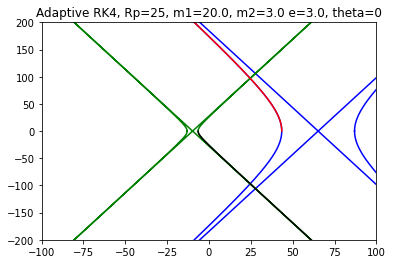

In [18]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-100,100)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor1,t,1),hyperbfns.getytheory(theta0,ecc0,semimajor1,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor0,t,-1),hyperbfns.getytheory(theta0,ecc0,semimajor0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'k')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

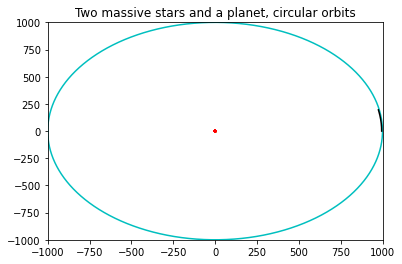

In [52]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-1000,1000)
plt.xlim(-1000,1000)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0[0]*masses[1]/mtot
semimajor1=rad0[0]*masses[0]/mtot
#plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.title("Two massive stars and a planet, circular orbits")
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor0,t,1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor1,t,-1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor1,t,-1),'g')
plt.plot(ellipsefns.getxtheory(theta0[1],ecc0[1],rad0[1],t,1),ellipsefns.getytheory(theta0[1],ecc0[1],rad0[1],t,1),'c')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.plot(npstar3x[:,0],npstar3x[:,1],'k')
plt.show()

[100. 100.   1.]
200.0
[10, 1000]


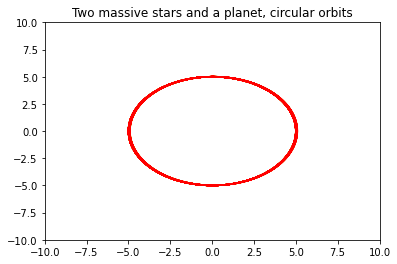

In [51]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-10,10)
plt.xlim(-10,10)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0[0]*masses[1]/mtot
semimajor1=rad0[0]*masses[0]/mtot
print(masses)
print(mtot)
print(rad0)
#circular
#plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.title("Two massive stars and a planet, circular orbits")
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor0,t,1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor1,t,-1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor1,t,-1),'g')
plt.plot(ellipsefns.getxtheory(theta0[1],ecc0[1],rad0[1],t,1),ellipsefns.getytheory(theta0[1],ecc0[1],rad0[1],t,1),'c')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.plot(npstar3x[:,0],npstar3x[:,1],'k')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
#plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
#plt.axis('equal')
xth1=parabfns.getxtheory(theta0,ecc0,semimajor1,t,1)
yth1=parabfns.getytheory(theta0,ecc0,semimajor1,t,1)
xth0=parabfns.getxtheory(theta0,ecc0,semimajor0,t,-1)
yth0=parabfns.getytheory(theta0,ecc0,semimajor0,t,-1)
plt.plot(xth1,yth1,'b')
plt.plot(xth0,yth0,'g')
#plt.plot(xth1,yth1,'o')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

array([[-5.        ,  0.        ,  0.        , -0.        , -2.23606798,
         0.        ],
       [-4.99995   , -0.02236061,  0.        ,  0.00999998, -2.23604562,
         0.        ],
       [-4.99970026, -0.05474722,  0.        ,  0.02448372, -2.23593393,
         0.        ],
       ...,
       [ 1.78063609, -4.70173866,  0.        ,  2.10598963,  0.75281649,
         0.        ],
       [ 1.8729776 , -4.66770168,  0.        ,  2.09076873,  0.7941042 ,
         0.        ],
       [ 1.96463157, -4.63185452,  0.        ,  2.0747383 ,  0.83508442,
         0.        ]])

# RK4 Quality Tests

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [19]:
import Lstability

In [20]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,masses)
deltaL, Lavg

(4.2247752805775575e-13, -58.976782461941035)

In [21]:
deltaL*Lavg

-2.4916365267320852e-11

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [22]:
import Estability

In [23]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, masses)
deltaE, Eavg

(6.4702181025161126e-12, 1.1999999998439825)

In [24]:
deltaE*Eavg

7.764261722009868e-12

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5